In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mkhanmohamadi","key":"4b0fd1faf342e804f0cc9a17843834af"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download muthuj7/weather-dataset

  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 34.3MB/s]


In [8]:
! unzip /content/weather-dataset.zip -d weather-dataset

Archive:  /content/weather-dataset.zip
  inflating: weather-dataset/weatherHistory.csv  


In [9]:
! rm us-weather-events.zip


rm: cannot remove 'us-weather-events.zip': No such file or directory


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv('/content/weather-dataset/weatherHistory.csv',dtype= {})

In [4]:
data

Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting in the morning.

[96453 rows x 12 columns]

In [13]:
pd.DataFrame(data[['Precip Type']].value_counts(),columns=['Frequency'])


Frequency
Precip Type           
rain             85224
snow             10712

# EDA

In [14]:
df_weather=data

In [15]:
df_weather["Formatted Date"]=pd.to_datetime(df_weather["Formatted Date"])


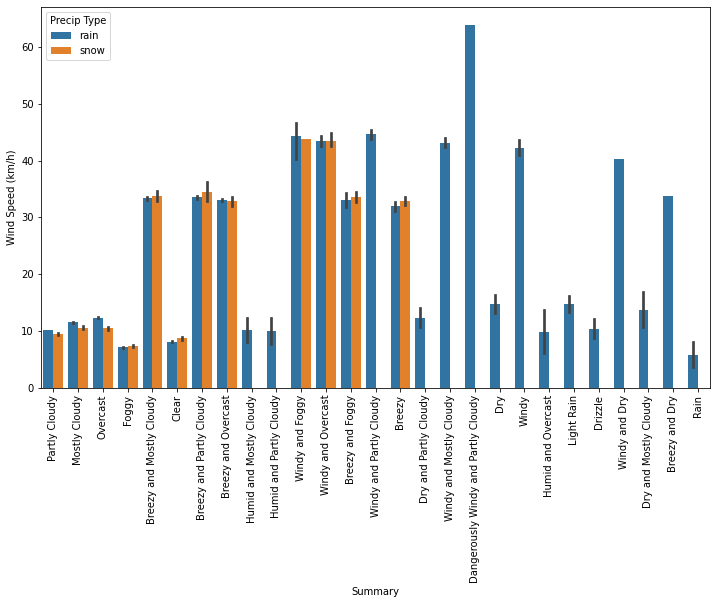

In [16]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=df_weather, x="Summary", y="Wind Speed (km/h)",hue="Precip Type")

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


KeyboardInterrupt: ignored

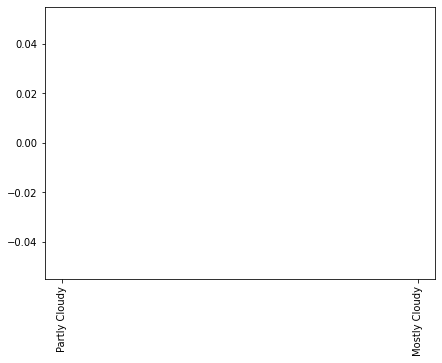

In [17]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.lineplot(data=df_weather, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

In [ ]:
sns.pairplot(df_weather,hue="Humidity")

In [ ]:
pip install pywedge


In [ ]:
import pywedge as pw


In [ ]:
x=pw.Pywedge_Charts(df_weather,c=None,y="Humidity")
charts=x.make_charts()

In [ ]:
df['year'] = [d.year for d in df.Dates]
df['month'] = [d.strftime('%b') for d in df.Dates]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=data['Temperature (C)'], data=df, ax=axes[0])
sns.boxplot(x='month', y=data['Temperature (C)'], data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [ ]:
data.columns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Pressure (millibars)'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Pressure (millibars)'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
df = data.copy()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(30,6), dpi= 100)
plot_acf(data['Temperature (C)'], lags=50, ax=axes[0])
plot_pacf(data['Temperature (C)'], lags=50, ax=axes[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
df = data
# ADF Test
result = adfuller(data['Temperature (C)'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(data['Temperature (C)'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# M

In [5]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Dates'] = pd.to_datetime(data['Formatted Date']).dt.date
data['Time'] = pd.to_datetime(data['Formatted Date']).dt.time

In [6]:
data['Time'] = data['Time'].astype(str)
data['Dates'] = data['Dates'].astype(str)
data['Datetime'] = pd.to_datetime(data['Dates'] + ' ' + data['Time'])
data.set_index(['Datetime'],inplace=True)

In [7]:
data['Dates'] = pd.to_datetime(data['Dates'])

In [ ]:
for i in data.columns:
  print(i,"--------------------------------------------------------------------")
  print(data[str(i)].value_counts())
  print("\n")

In [ ]:
import plotly.express as px
px.line(data['Humidity'],data['Formatted Date'])

In [ ]:
t =pd.crosstab(data["Formatted Date"],data.Humidity)

In [ ]:
import plotly.express as px
px.bar(t, x=t.index, y="Humidity")

In [ ]:
fig.show()

In [ ]:
plt.bar(t, x=t.index, y="Snow")

In [ ]:
plt.time(t, x=t.index, y="Snow")

# Stationary , seasonality , Trends

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['Temperature (C)'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

In [ ]:
rmean=data['Humidity'][0:1000].rolling(window=12).mean()
rstd=data['Humidity'][0:1000].rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(data['Humidity'][0:1000] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)


# Arima models


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data['Temperature (C)'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
value = 'Temperature (C)'
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data[value]); axes[0, 0].set_title('Original Series')
plot_acf(data[value], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data[value].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data[value].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data[value].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data[value].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
def feature_engineer_date_time(df):
  categorical_col = [['click_time' , 'is_attributed']]

  df['click_time'] = pd.to_datetime(df['click_time'])
  df['Year'] = df['click_time'].dt.year
  df['Month'] = df['click_time'].dt.month
  df['Day'] = df['click_time'].dt.day

  df['Hour'] = df['click_time'].dt.hour 
  df['minute'] = df['click_time'].dt.minute 

  df.drop(columns=['click_time','attributed_time'],inplace = True)

  return df

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data['Temperature (C)'], order=(5,1,2))
model_fit = model.fit()
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series.index = series.index.to_period('M')
series = data
# fit model
# model = ARIMA(np.array((data['Temperature (C)'])), order=(1,0,0))
# model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
def split_train_valid_test(X, y, y_date, train_range=0.6, valid_range=0.6, test_range=0.5):
    """Split X and y into train, valid, and test periods.
    Params:
        X (numpy.array): Input for lstm
        y (numpy.array): Output for lstm
        y_date (list): Datetime of output
        train_range (tuple): Train period
        valid_range (tuple): Validation period
        test_range (tuple): Test period
    Returns:
        X_train (pandas.DataFrame)
        X_valid (pandas.DataFrame)
        X_test (pandas.DataFrame)
        y_train (pandas.DataFrame)
        y_valid (pandas.DataFrame)
        y_test (pandas.DataFrame)
        y_date_train (list)
        y_date_valid (list)
        y_date_test (list)
    """
    train_end_idx = y_date.index(train_range[1])
    valid_end_idx = y_date.index(valid_range[1])
    
    X_train = X[:train_end_idx+1, :]
    X_valid = X[train_end_idx+1:valid_end_idx+1, :]
    X_test = X[valid_end_idx+1:, :]
    
    y_train = y[:train_end_idx+1]
    y_valid = y[train_end_idx+1:valid_end_idx+1]
    y_test = y[valid_end_idx+1:]
    
    y_date_train = y_date[:train_end_idx+1]
    y_date_valid = y_date[train_end_idx+1:valid_end_idx+1]
    y_date_test = y_date[valid_end_idx+1:]
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test, y_date_train, y_date_valid, y_date_test

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(data[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
pip install darts

In [ ]:
data['Dates'] = str(data['Dates'])

In [ ]:
data

In [ ]:
data.drop(['Dates'].index,index=True)

In [ ]:
data.reset_index(inplace=True)
# data['Dates'] = data['Dates'].astype(str)
# data.set_index(['Datetime'],inplace=True)

In [ ]:
data

In [ ]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
# df = pd.read_csv('AirPassengers.csv', delimiter=",")
# data = data[~data.index.duplicated(keep='first')]
# data.set_index(['Dates'],inplace=True)
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_times_and_values(data.index,data['Temperature (C)'])

# Set aside the last 36 months as a validation series
# series = data['Temperature (C)']
# train, val = series[:-5000], series[-5000:]

In [ ]:
series1, series2 = series.split_before(0.75)


In [ ]:
series

<TimeSeries (DataArray) (time: 96453, component: 1, sample: 1)>
array([[[ 9.47222222]],

       [[ 9.35555556]],

       [[ 9.37777778]],

       ...,

       [[22.03888889]],

       [[21.52222222]],

       [[20.43888889]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 ... 96447 96448 96449 96450 96451 96452
  * component  (component) <U1 '0'
Dimensions without coordinates: sample

In [ ]:
series.pd_dataframe()

component          0
time                
0           9.472222
1           9.355556
2           9.377778
3           8.288889
4           8.755556
...              ...
96448      26.016667
96449      24.583333
96450      22.038889
96451      21.522222
96452      20.438889

[96453 rows x 1 columns]

In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning:

overflow encountered in matmul



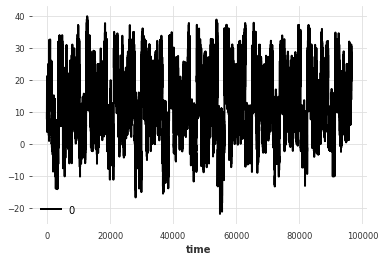

In [ ]:
series.plot()


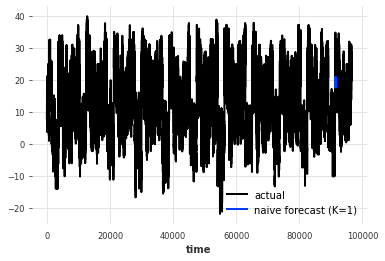

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=10)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label='actual')
naive_forecast.plot(label='naive forecast (K=1)')

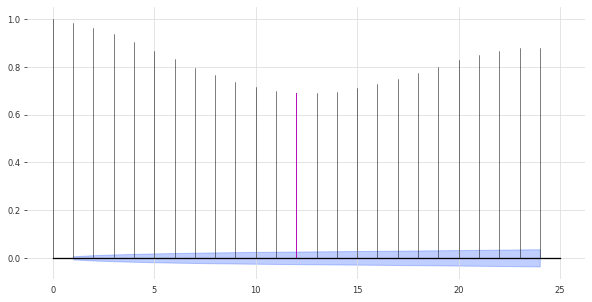

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=.05)

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=.05)
    if is_seasonal:
        print('There is seasonality of order {}.'.format(period))

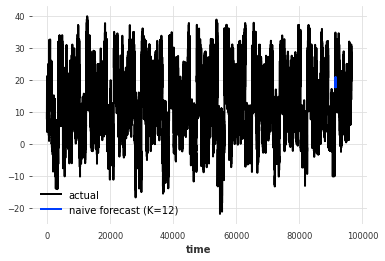

In [ ]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label='actual')
seasonal_forecast.plot(label='naive forecast (K=12)')

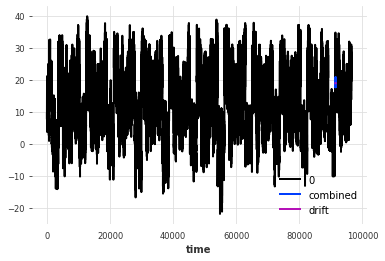

In [ ]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label='combined')
drift_forecast.plot(label='drift')

In [ ]:
from darts.metrics import mape

print("Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
      mape(series, combined_forecast)))

Mean absolute percentage error for the combined naive drift + seasonal: 14.83%.


In [ ]:
from darts.models import ExponentialSmoothing, Prophet, AutoARIMA, Theta

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))

# eval_model(ExponentialSmoothing())
# eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

KeyboardInterrupt: ignored

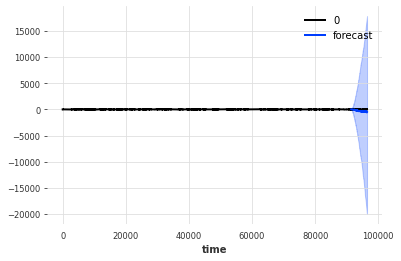

In [ ]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [ ]:
a = AirPassengersDataset().load()
a.plot()

NameError: ignored

In [ ]:
a.to

NameError: ignored

In [ ]:
series1 = data.copy()
series1.set_index(['Dates'],inplace=True)

In [ ]:
series = series1['Temperature (C)']

In [ ]:
series.pd_dataframe()['Temp']

component   #Passengers
Month                  
1949-01-01        112.0
1949-02-01        118.0
1949-03-01        132.0
1949-04-01        129.0
1949-05-01        121.0
...                 ...
1960-08-01        606.0
1960-09-01        508.0
1960-10-01        461.0
1960-11-01        390.0
1960-12-01        432.0

[144 rows x 1 columns]

In [ ]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

AttributeError: ignored

In [ ]:
type(series)

darts.timeseries.TimeSeries

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cb419e790>,
      dtype=object)

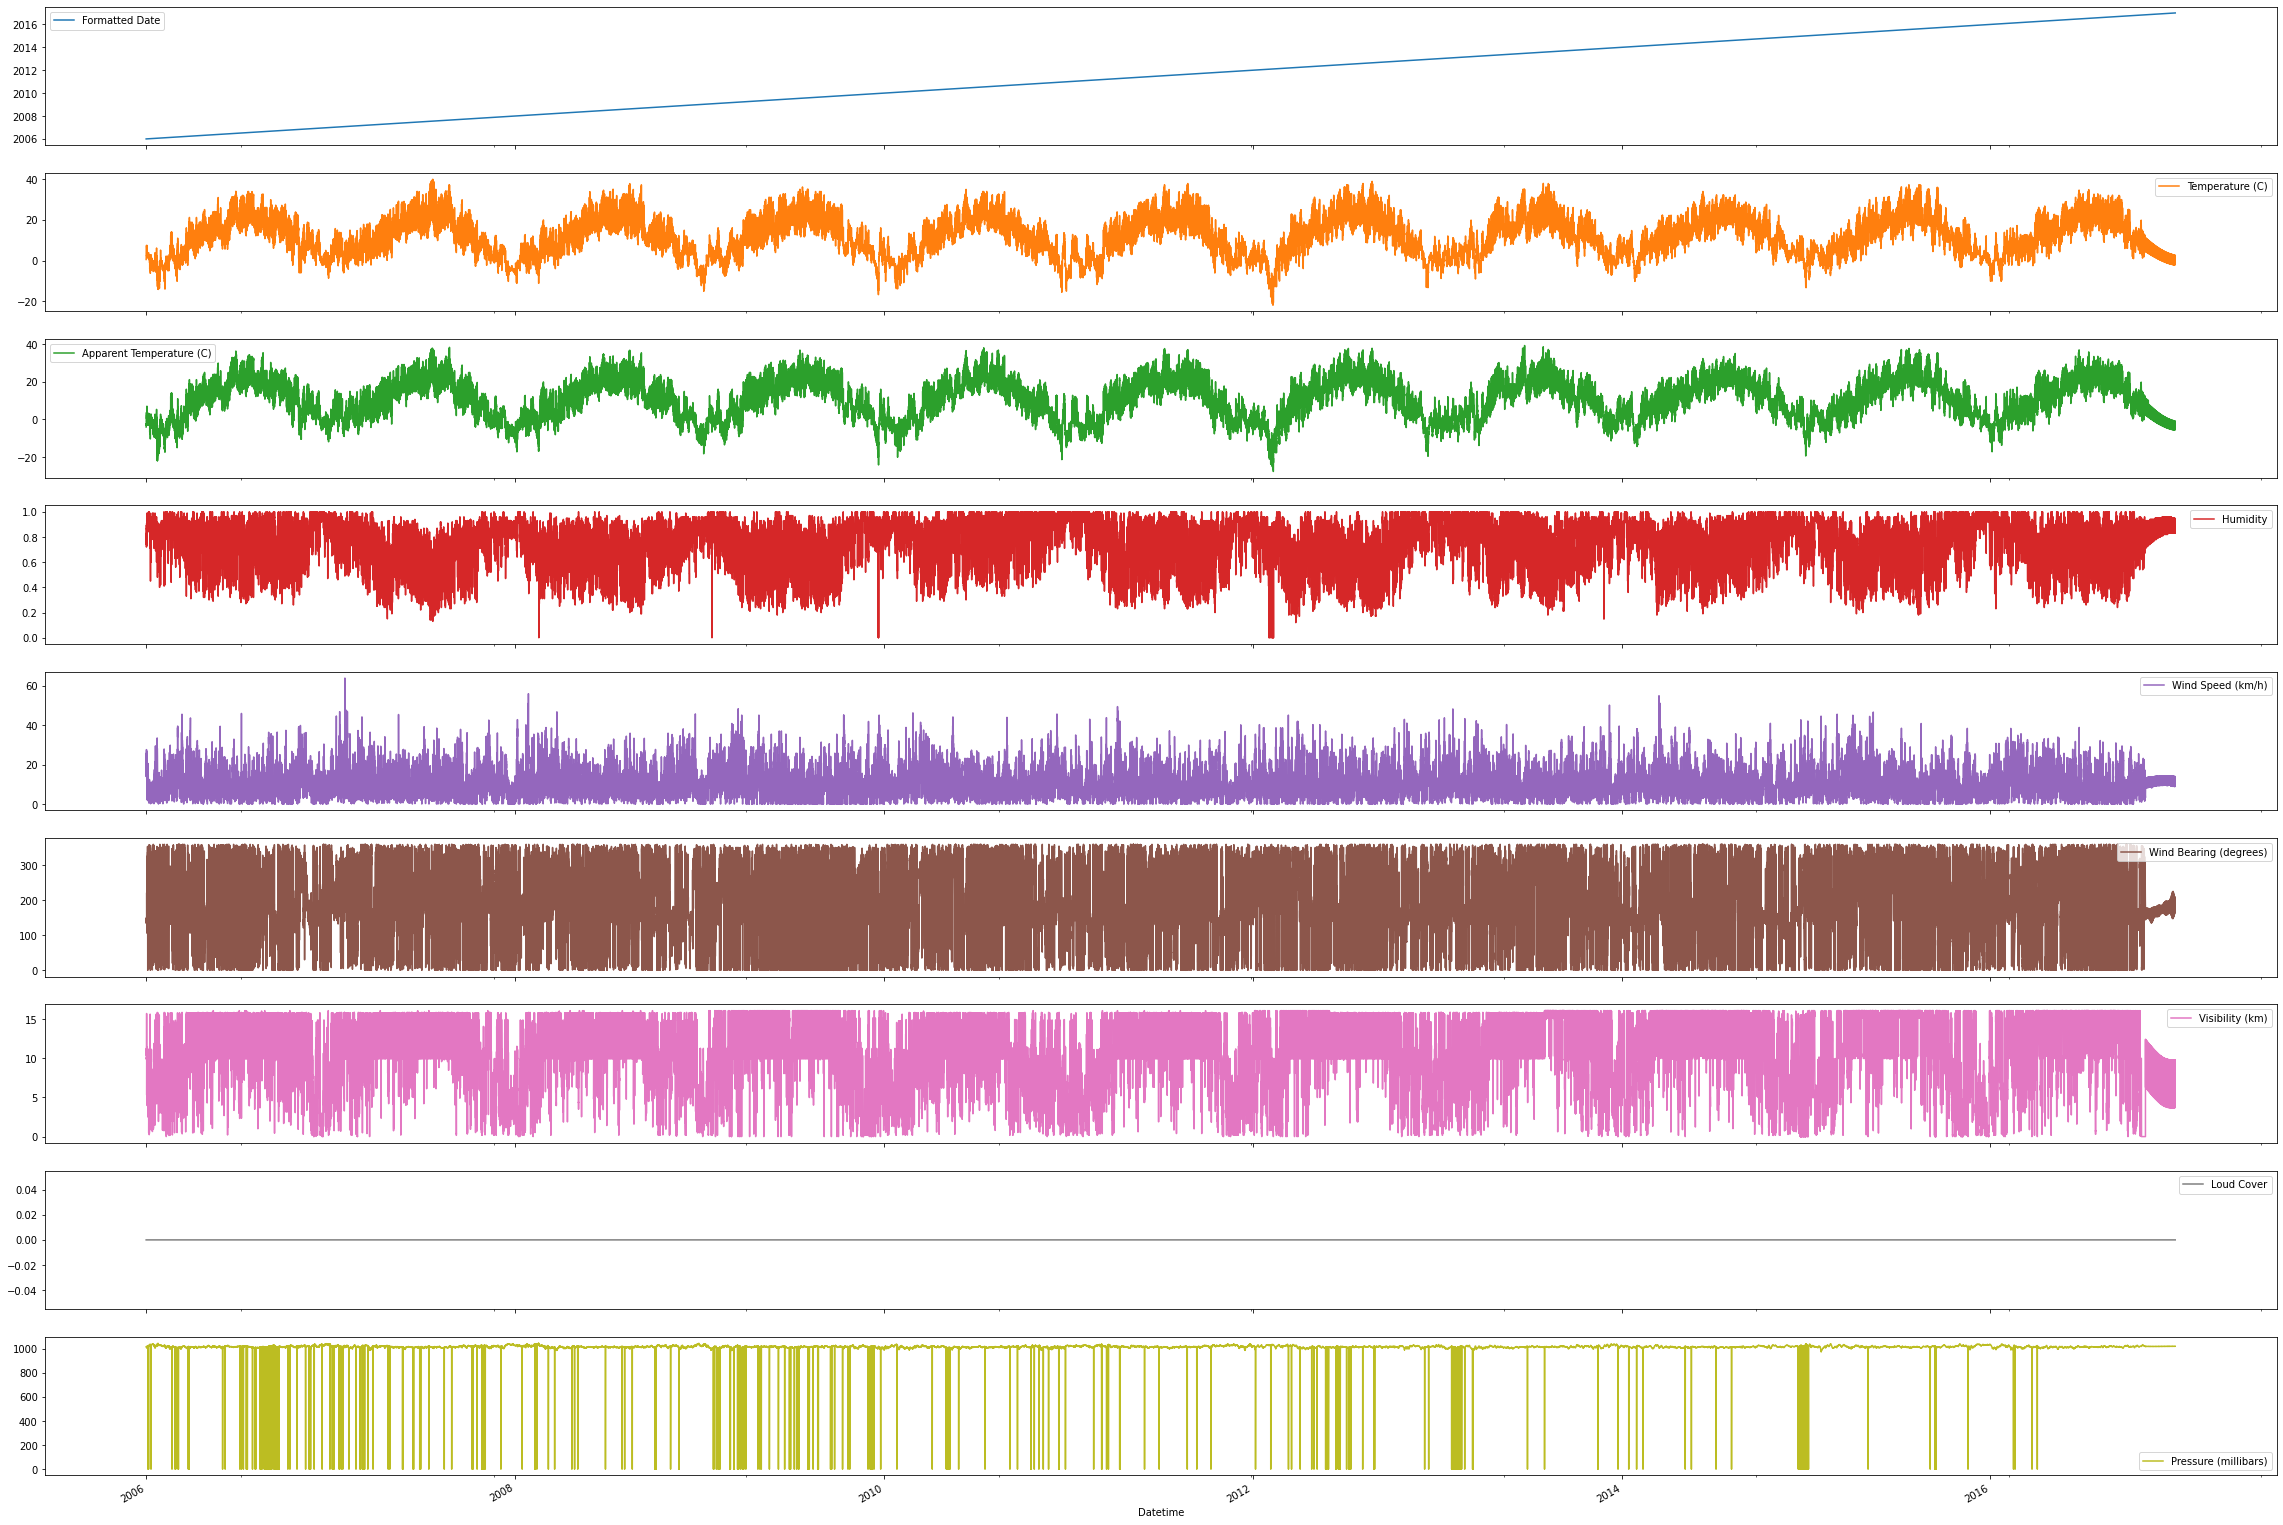

In [ ]:
data.plot(subplots=True,figsize = (40,30))

In [ ]:
data.resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

ValueError: ignored

In [ ]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [ ]:
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

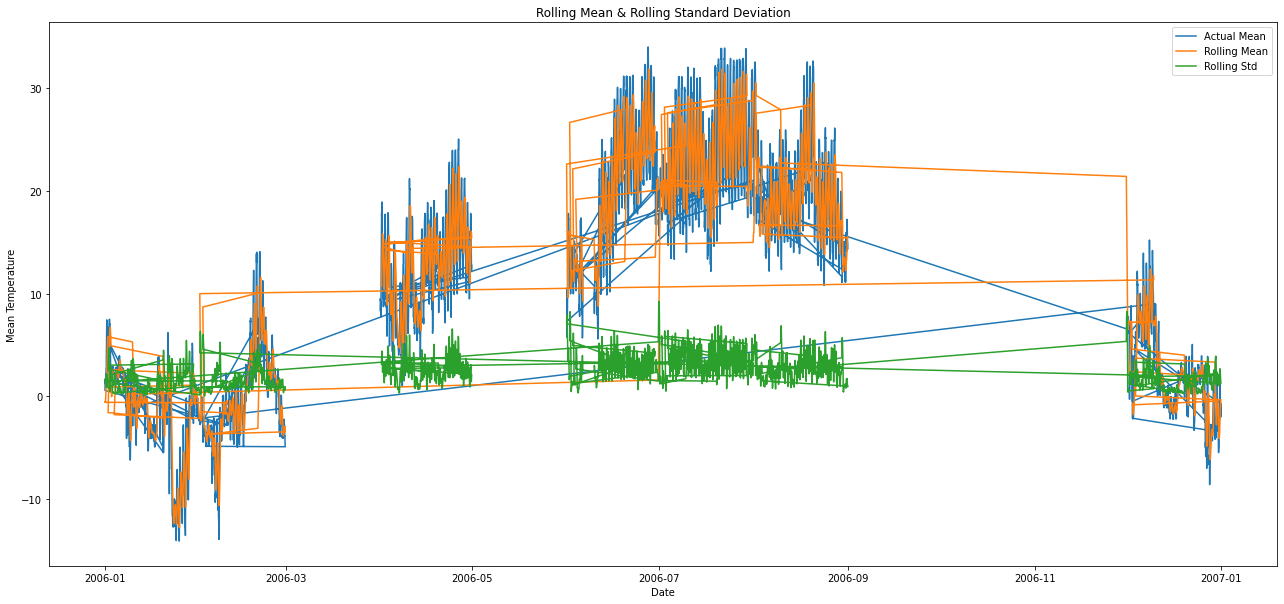

Test statistic:  -2.746729656106246
Critical Values: {'1%': -3.4316672302646283, '5%': -2.8621220724882153, '10%': -2.5670798380375506}


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_rolling_mean_std(data[0:5000]['Temperature (C)'])
perform_dickey_fuller_test(data[0:5000]['Temperature (C)'])

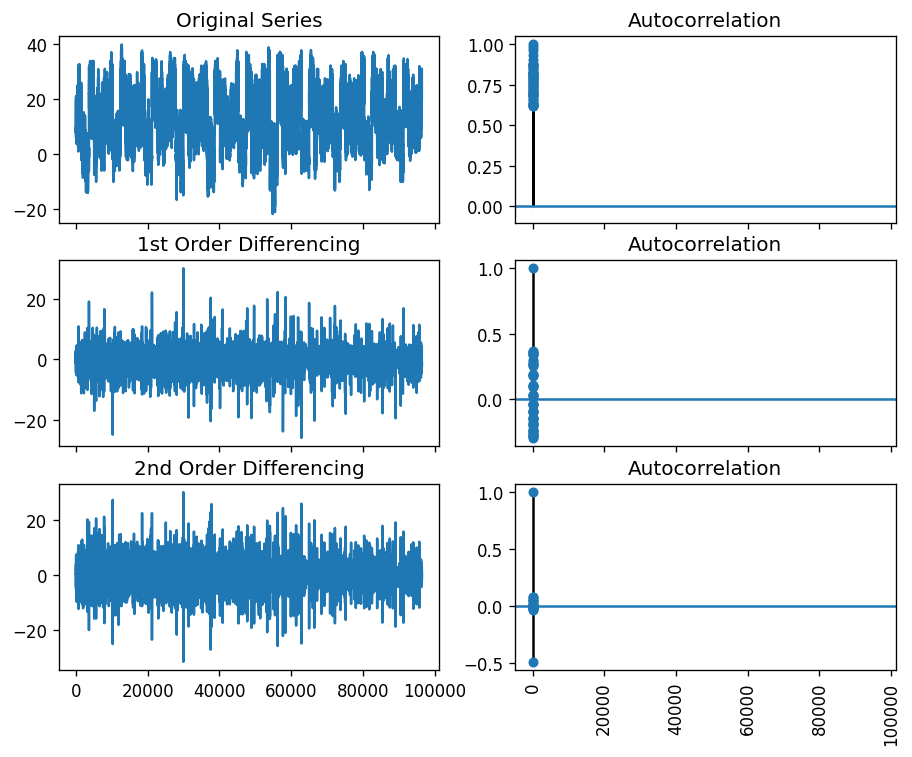

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
a = 100000
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data[0:a]['Temperature (C)'].values); 
axes[0, 0].set_title('Original Series')
plot_acf(data[0:a]['Temperature (C)'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data[0:a]['Temperature (C)'].diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data[0:a]['Temperature (C)'].diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data[0:a]['Temperature (C)'].diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data[0:a]['Temperature (C)'].diff().diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


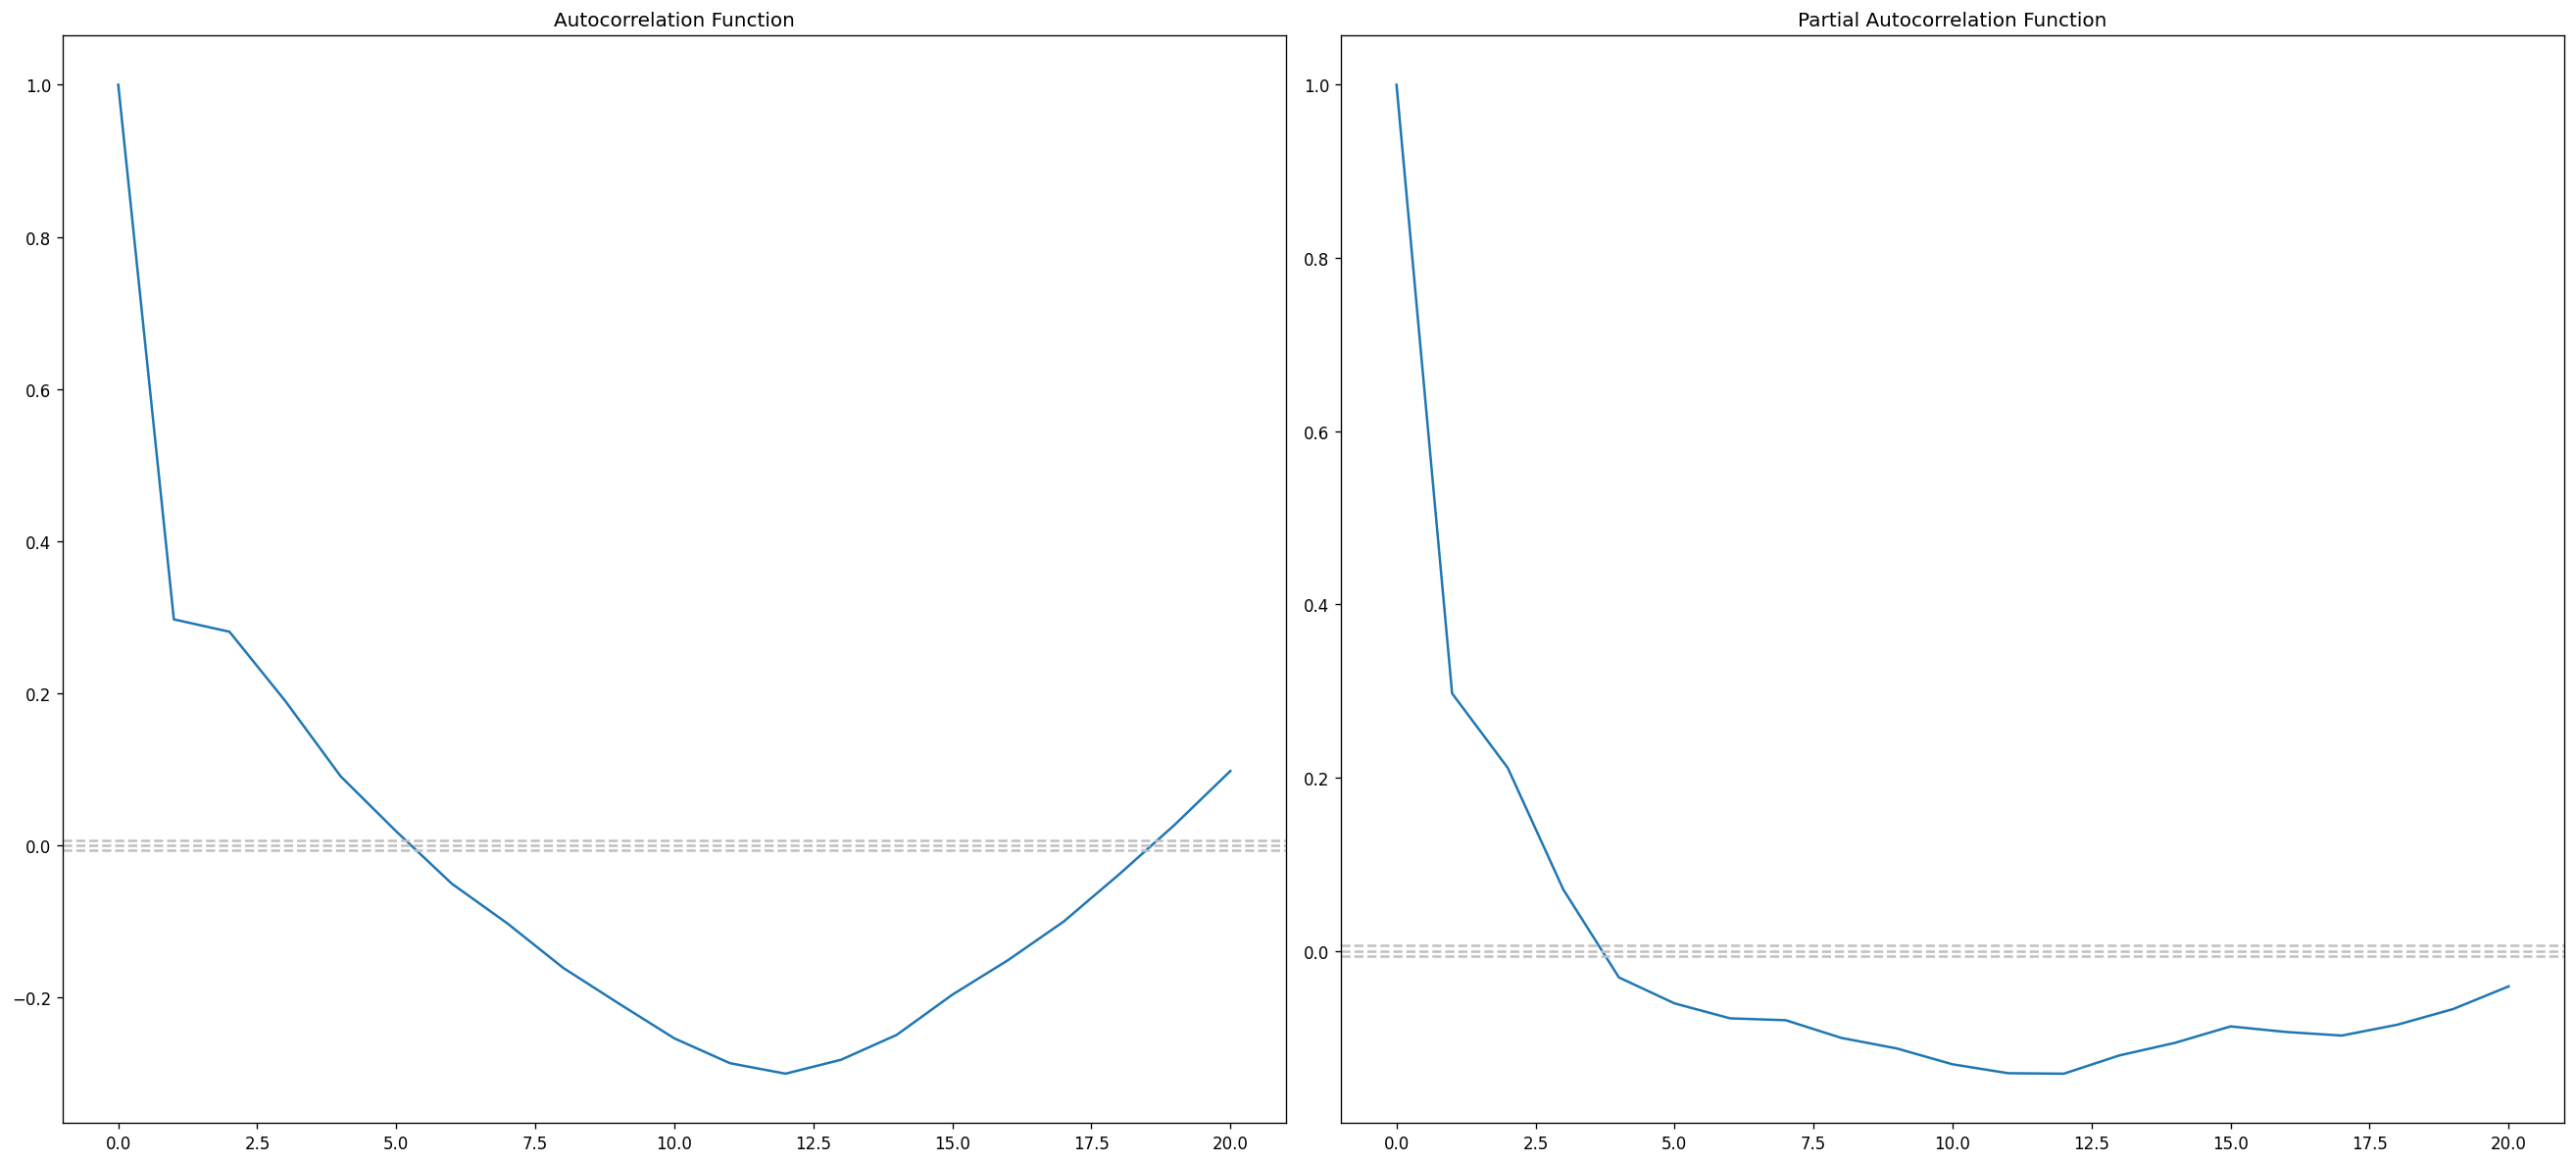

In [ ]:
acf_lag = acf(data[0:a]['Temperature (C)'].diff().dropna().values, nlags=20)
pacf_lag = pacf(data[0:a]['Temperature (C)'].diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(data[0:a]['Temperature (C)'].diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(data[0:a]['Temperature (C)'].diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(data[0:a]['Temperature (C)'].diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(data[0:a]['Temperature (C)'].diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [ ]:
model = ARIMA(data[0:a]['Temperature (C)'].values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                96453
Model:                     ARMA(2, 2)   Log Likelihood             -171526.370
Method:                       css-mle   S.D. of innovations              1.432
Date:                Fri, 21 Jan 2022   AIC                         343064.739
Time:                        09:13:48   BIC                         343121.600
Sample:                             0   HQIC                        343082.023
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9336      0.201     59.234      0.000      11.539      12.329
ar.L1.y        1.6529      0.006    293.022      0.000       1.642       1.664
ar.L2.y       -0.6682      0.006   -120.514      0.0

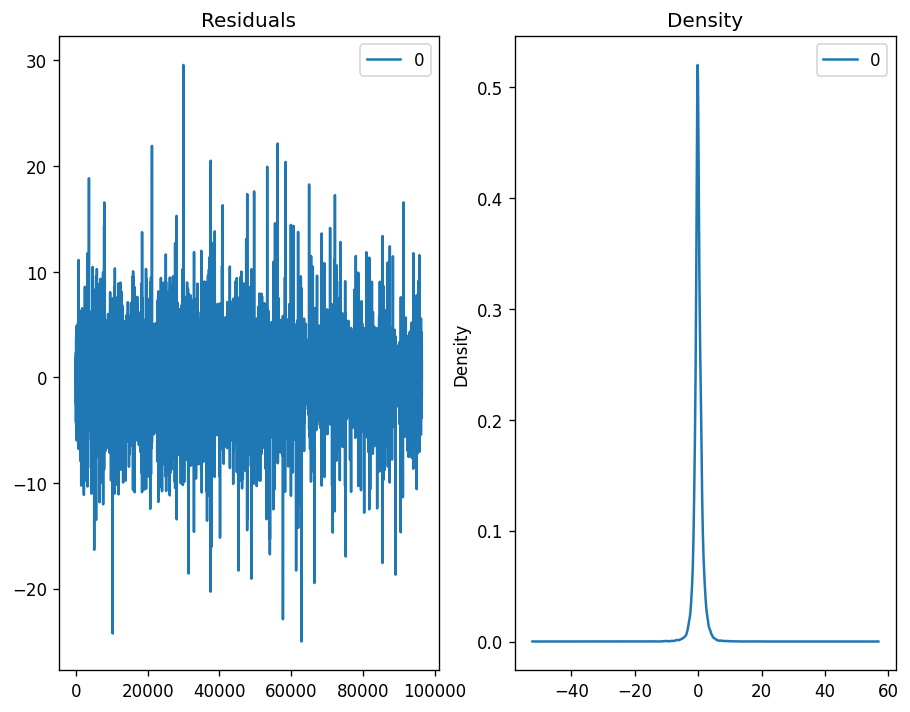

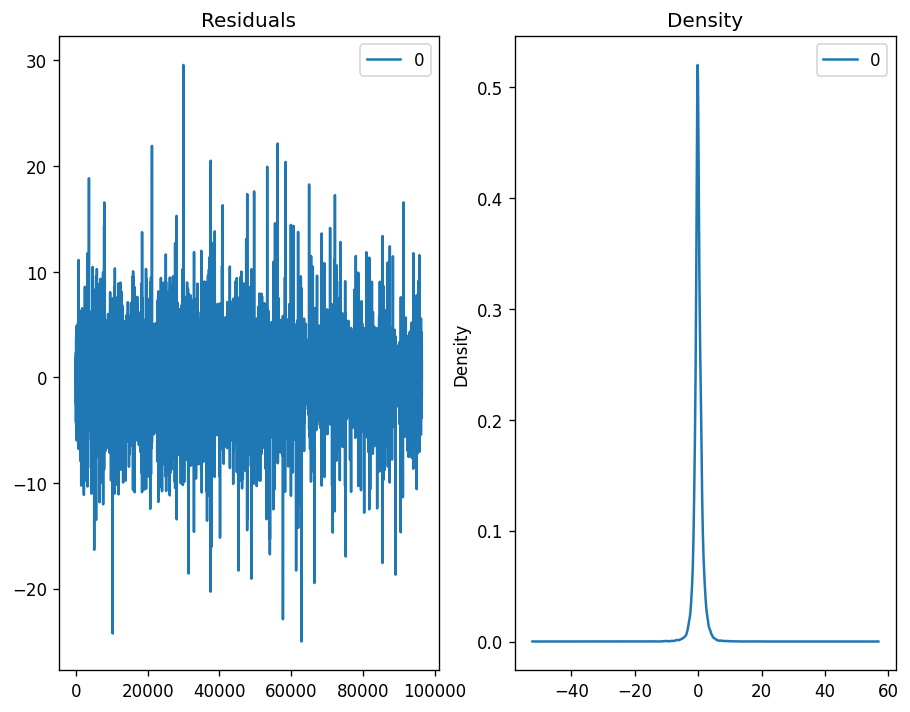

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

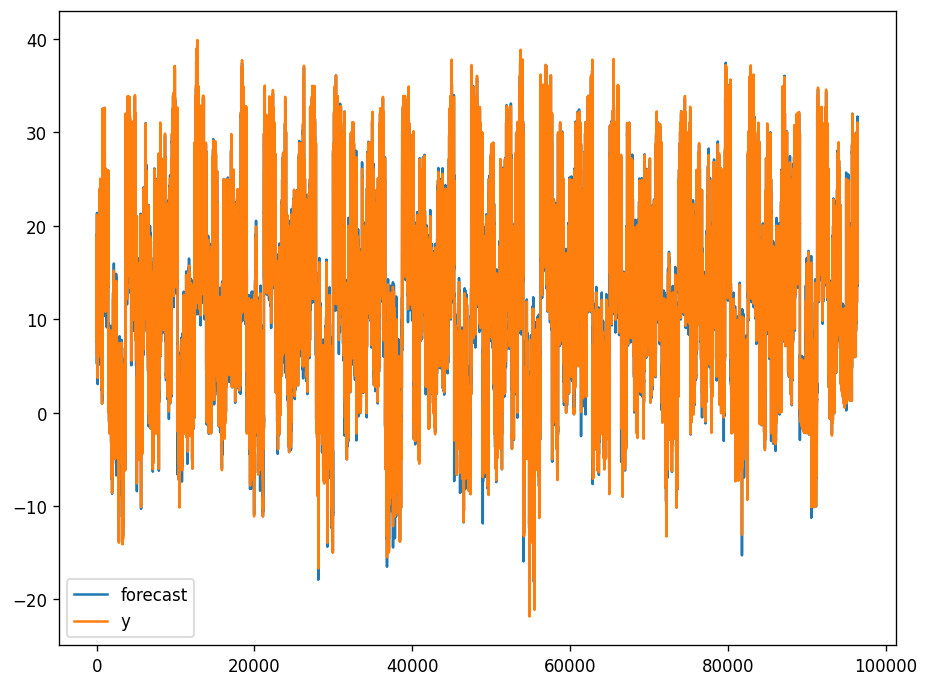

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

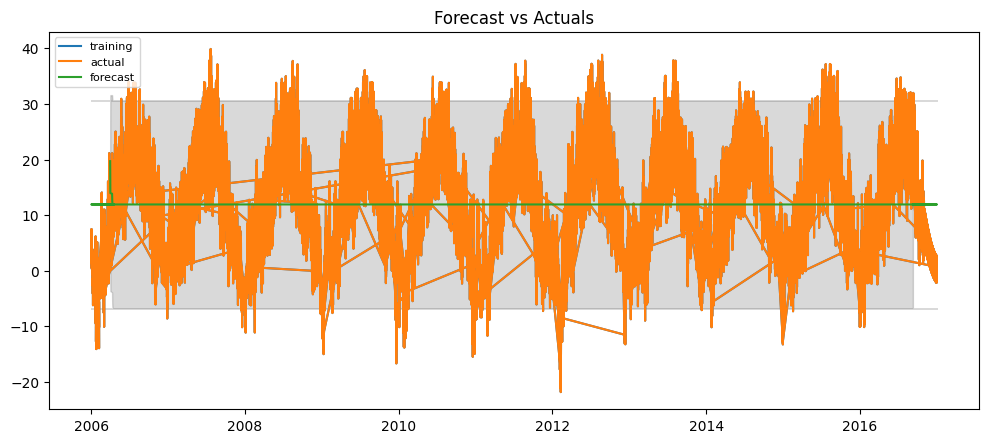

In [ ]:
# # Forecast
fc, se, conf = model_fit.forecast(96453, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=data[0:a]['Temperature (C)'].index)
lower_series = pd.Series(conf[:, 0], index=data[0:a]['Temperature (C)'].index)
upper_series = pd.Series(conf[:, 1], index=data[0:a]['Temperature (C)'].index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data[0:a]['Temperature (C)'], label='training')
plt.plot(data[0:a]['Temperature (C)'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# test_df.index

In [ ]:
data.sort_index(inplace=True)

# Decompose Time Series


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = ...
result = seasonal_decompose(x=data[0:10000]['Temperature (C)'], model='additive', extrapolate_trend='freq', freq=200)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Datetime
2005-12-31 23:00:00    3.795666
2006-01-01 00:00:00    3.776815
2006-01-01 01:00:00    3.757964
2006-01-01 02:00:00    3.739113
2006-01-01 03:00:00    3.720262
                         ...   
2007-02-21 10:00:00    3.508532
2007-02-21 11:00:00    3.494891
2007-02-21 12:00:00    3.481251
2007-02-21 13:00:00    3.467610
2007-02-21 14:00:00    3.453969
Name: Temperature (C), Length: 10000, dtype: float64
Datetime
2005-12-31 23:00:00   -0.033881
2006-01-01 00:00:00   -0.030893
2006-01-01 01:00:00   -0.143522
2006-01-01 02:00:00   -0.438595
2006-01-01 03:00:00   -0.724402
                         ...   
2007-02-21 10:00:00    0.226124
2007-02-21 11:00:00    0.006118
2007-02-21 12:00:00    0.176333
2007-02-21 13:00:00    0.129161
2007-02-21 14:00:00    0.216553
Name: Temperature (C), Length: 10000, dtype: float64
Datetime
2005-12-31 23:00:00   -3.184007
2006-01-01 00:00:00   -2.584811
2006-01-01 01:00:00   -1.947775
2006-01-01 02:00:00   -1.589407
2006-01-01 03:00:00   -1.812526
   

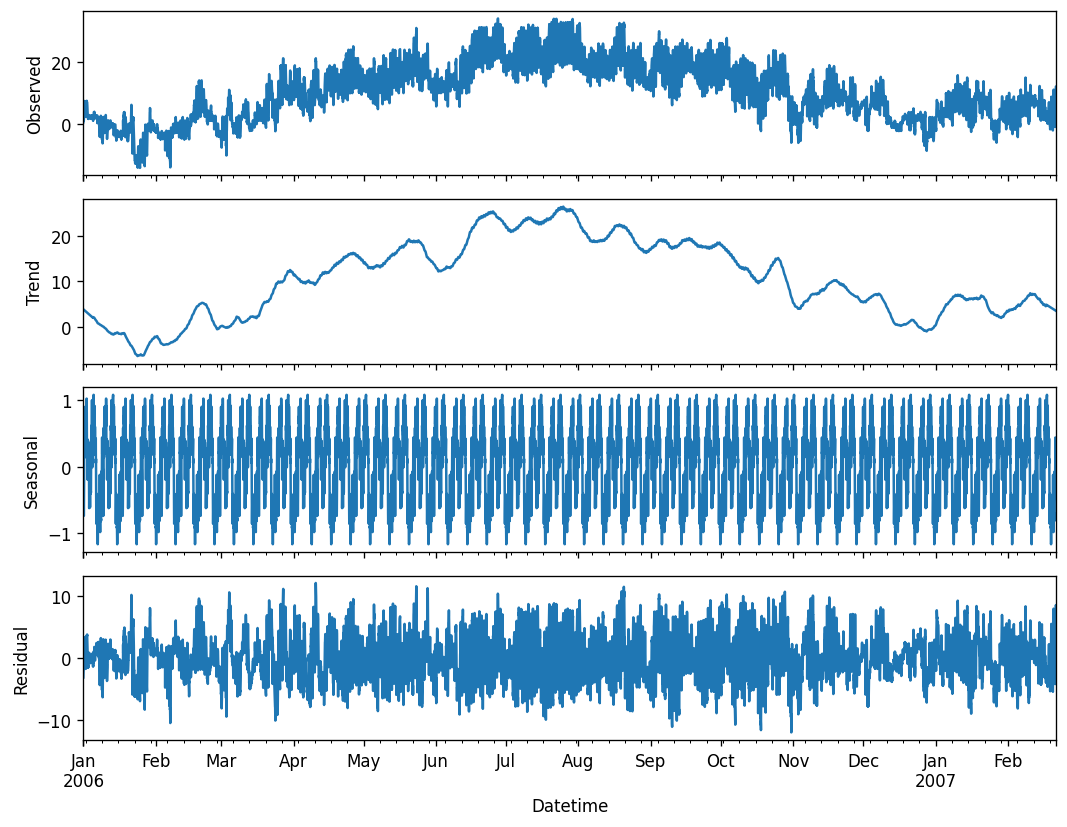

In [ ]:
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.seasonal import STL
res = STL(data['Temperature (C)']).fit()
res.plot()
plt.show()

ImportError: ignored

In [ ]:
pip install statsmodels==0.12.1


     |████████████████████████████████| 9.5 MB 28.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Invoke seasonal_decompose function
from hana_ml.algorithms.pal.tsa.seasonal_decompose import seasonal_decompose
stats, decompose =  seasonal_decompose(data= gasoline_df, endog = 'Sales', key='ID')

# show the results
print(stats.collect())
print(decompose.collect())

ModuleNotFoundError: ignored

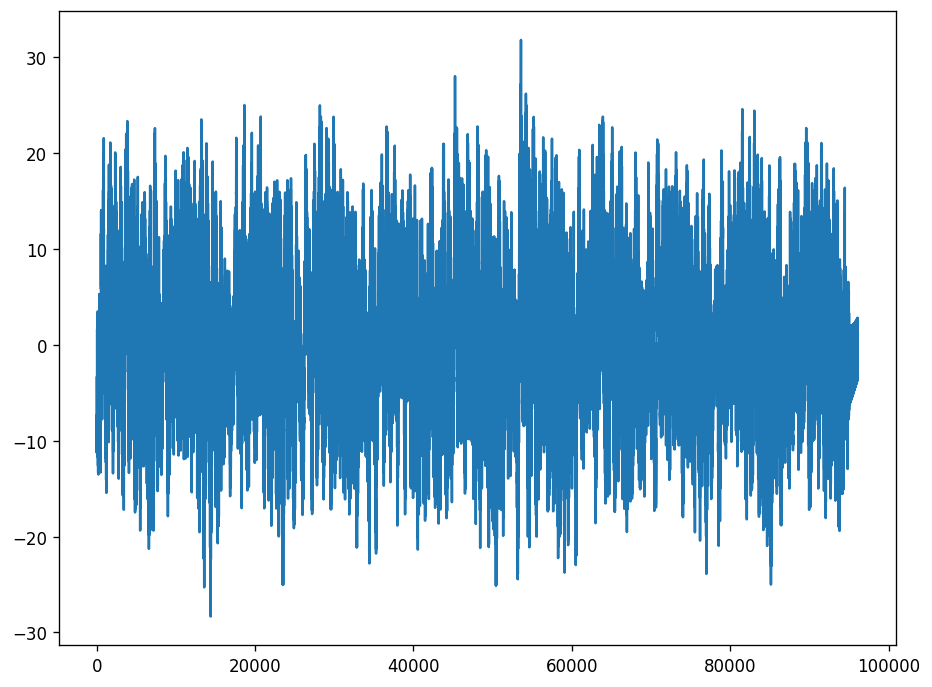

In [ ]:
# X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(data)):
	value = data['Temperature (C)'][i] - data['Temperature (C)'][i - days_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Datetime
2005-12-31     0.577778
2006-01-31    -1.677942
2006-02-28    -0.065394
2006-03-31     4.559274
2006-04-30    12.635031
2006-05-31    15.650732
2006-06-30    19.354622
2006-07-31    23.588665
2006-08-31    19.478726
2006-09-30    18.167731
2006-10-31    12.844758
2006-11-30     7.137701
2006-12-31     2.218220
Freq: M, Name: Temperature (C), dtype: float64


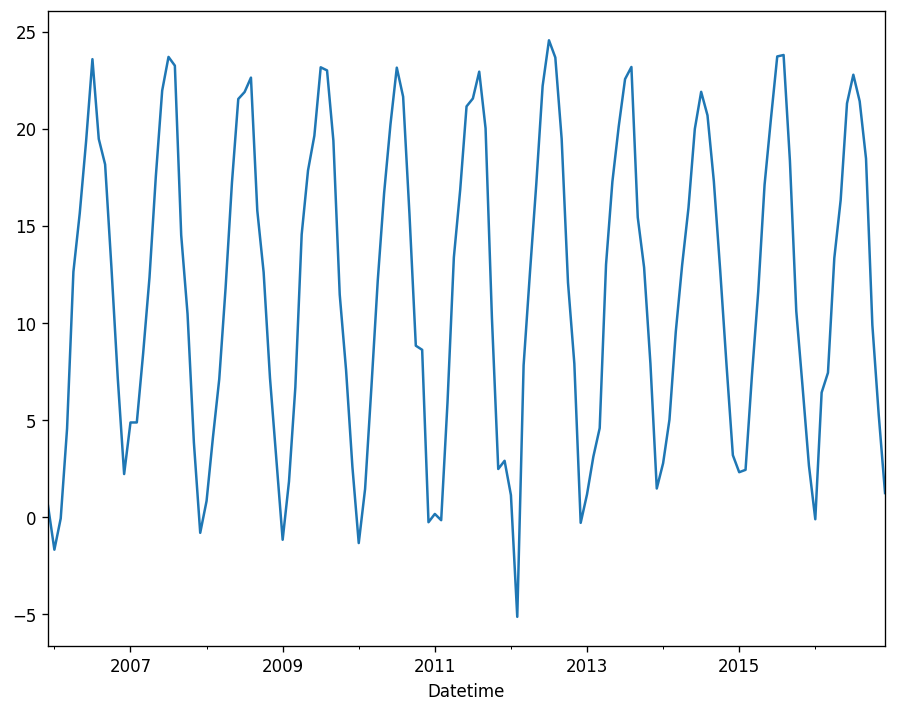

In [ ]:
resample = data['Temperature (C)'].resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

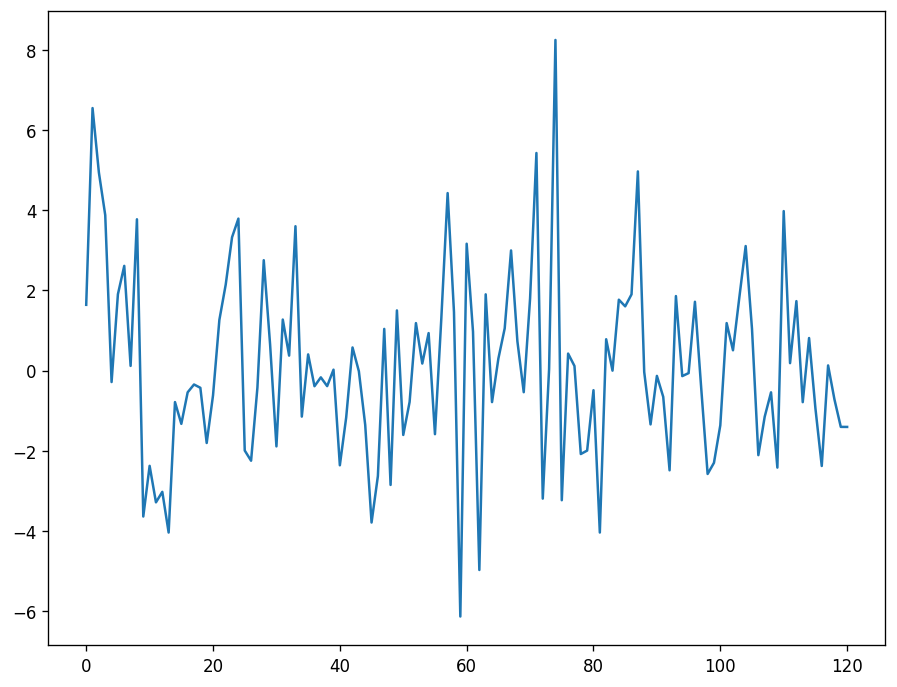

In [ ]:
resample = data['Temperature (C)'].resample('M')
monthly_mean = resample.mean()
X = data['Temperature (C)'].values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
	value = monthly_mean[i] - monthly_mean[i - months_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [ ]:
for i in range(days_in_year, len(X)):
	month_str = str(data['Temperature (C)'].index[i].year-1)+'-'+str(data['Temperature (C)'].index[i].month)
	month_mean_last_year = data['Temperature (C)'][month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

KeyError: ignored

In [ ]:
month_str

'2005-1'

/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Coefficients: [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -8.51909766e-143  2.62503834e-138
 -1.28276424e-134 -1.99189531e-130 -7.47265692e-128  1.58831329e-122
  1.51355685e-118  1.25489162e-115 -1.23151906e-110 -1.50345285e-106
 -5.98875213e-103  7.04484002e-099  1.40388667e-094  9.99132177e-091
 -1.63440016e-087 -1.15325104e-082 -1.16381910e-078 -1.79120617e-075
  9.40875961e-071  1.14338399e-066  1.88031204e-063 -9.51829057e-059
 -9.55372655e-055  2.59732749e-051  1.08096476e-046  1.95416957e-043
 -9.92543205e-039 -1.50509235e-035  9.47747979e-031 -5.87020225e-027
  7.60497148e-024  7.42286935e-020 -4.43877568e-016  1.16825273e-012
 -1.71387576e-009  1

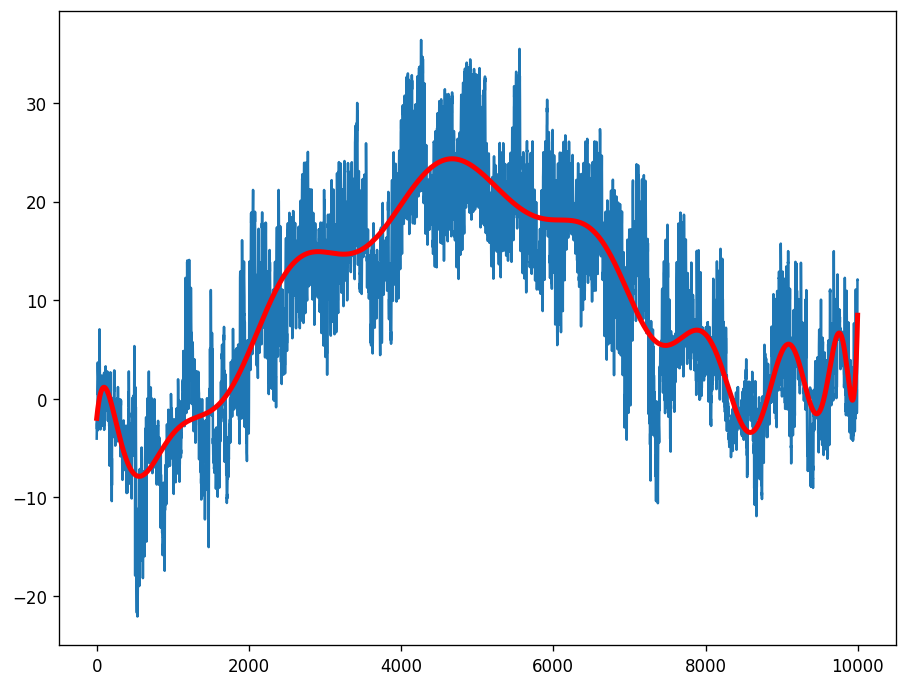

In [ ]:
from numpy import polyfit
X = [i%10000 for i in range(0, len(data[0:10000]['Apparent Temperature (C)']))]
y = data[0:10000]['Apparent Temperature (C)'].values
degree = 60
coef = polyfit(X,y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(data[0:10000]['Apparent Temperature (C)'].values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

In [ ]:
y[0:200]

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

FileNotFoundError: ignored

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
df_resample = data.resample('h').mean() 
df_resample.shape

(96432, 8)

In [ ]:
df_resample

Temperature (C)  ...  Pressure (millibars)
Datetime                              ...                      
2005-12-31 23:00:00         0.577778  ...               1016.66
2006-01-01 00:00:00         1.161111  ...               1016.15
2006-01-01 01:00:00         1.666667  ...               1015.87
2006-01-01 02:00:00         1.711111  ...               1015.56
2006-01-01 03:00:00         1.183333  ...               1014.98
...                              ...  ...                   ...
2016-12-31 18:00:00         0.488889  ...               1020.03
2016-12-31 19:00:00         0.072222  ...               1020.27
2016-12-31 20:00:00        -0.233333  ...               1020.50
2016-12-31 21:00:00        -0.472222  ...               1020.65
2016-12-31 22:00:00        -0.677778  ...               1020.72

[96432 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed =scaled
# series_to_supervised(df_resample)

In [ ]:
reframed = pd.DataFrame(reframed)

In [ ]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (87672, 1, 7) (87672,)


Epoch 1/20
126/126 - 5s - loss: 0.1258 - val_loss: 0.0416 - 5s/epoch - 37ms/step
Epoch 2/20
126/126 - 3s - loss: 0.0305 - val_loss: 0.0325 - 3s/epoch - 23ms/step
Epoch 3/20
126/126 - 3s - loss: 0.0289 - val_loss: 0.0246 - 3s/epoch - 23ms/step
Epoch 4/20
126/126 - 3s - loss: 0.0285 - val_loss: 0.0203 - 3s/epoch - 23ms/step
Epoch 5/20
126/126 - 2s - loss: 0.0276 - val_loss: 0.0175 - 2s/epoch - 19ms/step
Epoch 6/20
126/126 - 3s - loss: 0.0271 - val_loss: 0.0157 - 3s/epoch - 23ms/step
Epoch 7/20
126/126 - 3s - loss: 0.0269 - val_loss: 0.0152 - 3s/epoch - 23ms/step
Epoch 8/20
126/126 - 3s - loss: 0.0265 - val_loss: 0.0139 - 3s/epoch - 23ms/step
Epoch 9/20
126/126 - 3s - loss: 0.0264 - val_loss: 0.0133 - 3s/epoch - 23ms/step
Epoch 10/20
126/126 - 3s - loss: 0.0258 - val_loss: 0.0124 - 3s/epoch - 23ms/step
Epoch 11/20
126/126 - 3s - loss: 0.0260 - val_loss: 0.0121 - 3s/epoch - 23ms/step
Epoch 12/20
126/126 - 3s - loss: 0.0253 - val_loss: 0.0113 - 3s/epoch - 23ms/step
Epoch 13/20
126/126 - 3s 

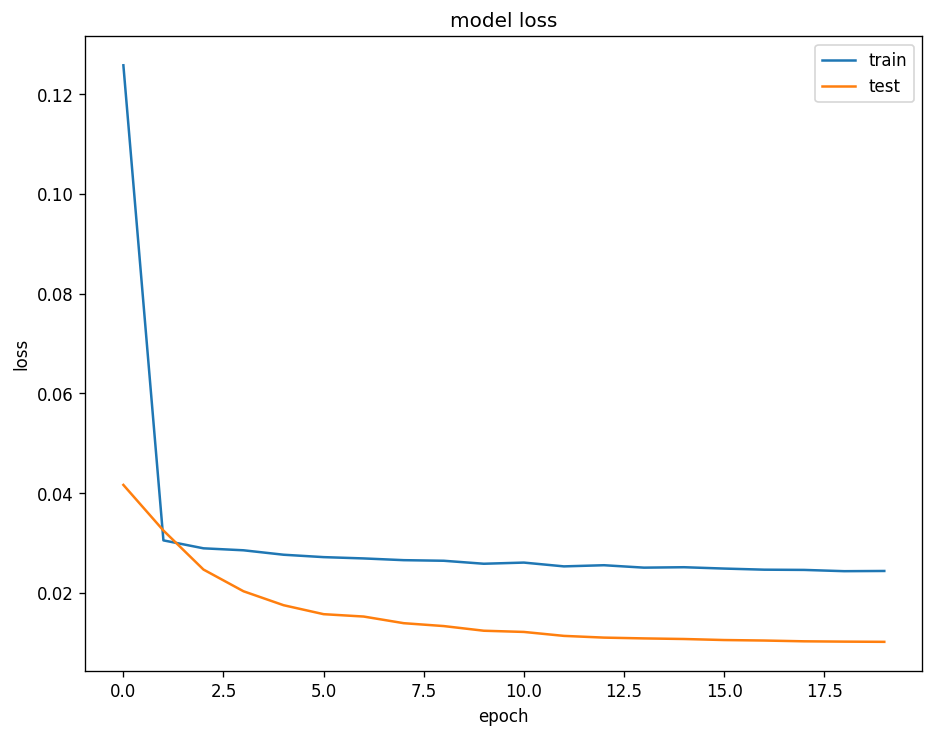

ValueError: ignored

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(70, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



Epoch 1/20
126/126 - 8s - loss: 0.1658 - val_loss: nan - 8s/epoch - 67ms/step
Epoch 2/20
126/126 - 6s - loss: 0.0364 - val_loss: nan - 6s/epoch - 44ms/step
Epoch 3/20
126/126 - 3s - loss: 0.0334 - val_loss: nan - 3s/epoch - 24ms/step
Epoch 4/20
126/126 - 3s - loss: 0.0315 - val_loss: nan - 3s/epoch - 24ms/step
Epoch 5/20
126/126 - 3s - loss: 0.0306 - val_loss: nan - 3s/epoch - 25ms/step
Epoch 6/20
126/126 - 6s - loss: 0.0302 - val_loss: nan - 6s/epoch - 44ms/step
Epoch 7/20
126/126 - 3s - loss: 0.0300 - val_loss: nan - 3s/epoch - 24ms/step
Epoch 8/20
126/126 - 6s - loss: 0.0295 - val_loss: nan - 6s/epoch - 44ms/step
Epoch 9/20
126/126 - 3s - loss: 0.0294 - val_loss: nan - 3s/epoch - 24ms/step
Epoch 10/20
126/126 - 3s - loss: 0.0291 - val_loss: nan - 3s/epoch - 24ms/step
Epoch 11/20
126/126 - 6s - loss: 0.0291 - val_loss: nan - 6s/epoch - 44ms/step
Epoch 12/20
126/126 - 6s - loss: 0.0286 - val_loss: nan - 6s/epoch - 44ms/step
Epoch 13/20
126/126 - 6s - loss: 0.0283 - val_loss: nan - 6s/

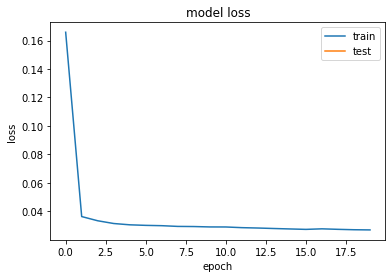

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(70, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [ ]:
pip install np_utils


     |████████████████████████████████| 61 kB 640 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=077d6643abf03e94b232829819b7e2007e18deb7b8892ed6ff44d5f1d2978212
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

# make a prediction
yhat = model.predict(test_X)
test_x = test_X.reshape((test_X.shape[0], 15))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, -15:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -15:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.101


In [ ]:
inv_yhat


array([[0.94780511, 0.34299343, 0.34959821, ..., 0.35933148, 0.194     ,
        0.        ],
       [0.94070137, 0.33057331, 0.33062712, ..., 0.4178273 , 0.153     ,
        0.        ],
       [0.94381267, 0.31824318, 0.32151437, ..., 0.44289694, 0.182     ,
        0.        ],
       ...,
       [0.95632935, 0.35469355, 0.36782371, ..., 0.48746518, 0.595     ,
        0.        ],
       [0.94604522, 0.3497435 , 0.36293596, ..., 0.50696379, 0.522     ,
        0.        ],
       [0.95101577, 0.34587346, 0.35895949, ..., 0.5264624 , 0.551     ,
        0.        ]])

In [ ]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

NameError: ignored

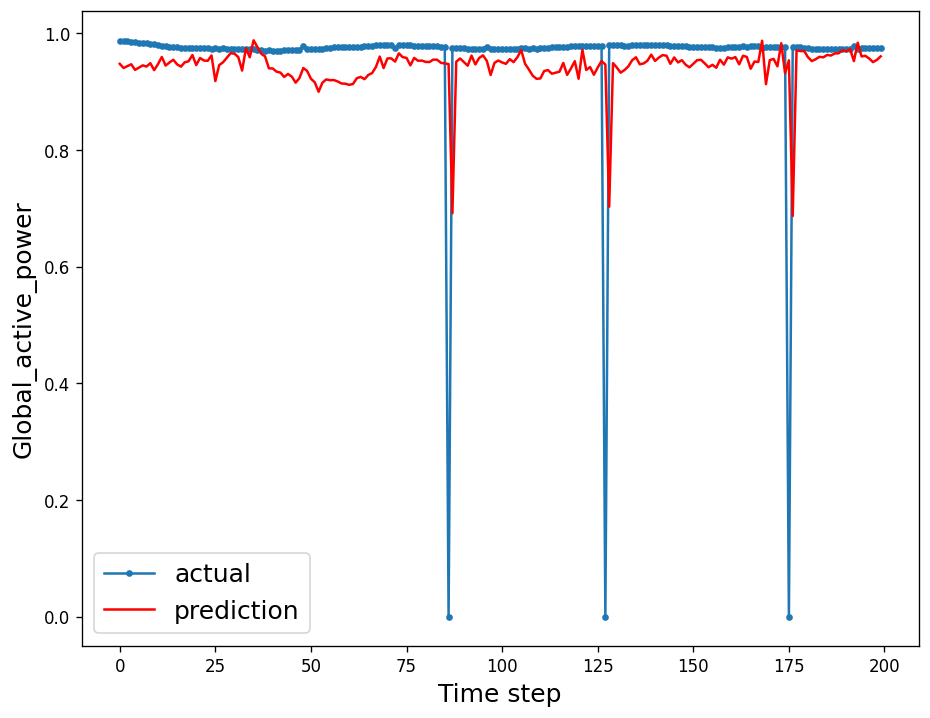

In [ ]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

# Lstm AutoEncoders


In [ ]:
monthly_series = data.pivot_table(index=['Dates'], columns='Temperature (C)', fill_value=0).reset_index().T
monthly_series.head()

In [ ]:
epochs = 20
batch = 128
lr = 0.0001

lstm_model = Sequential()
lstm_model.add(L.LSTM(10, input_shape=(serie_size, n_features), return_sequences=True))
lstm_model.add(L.LSTM(6, activation='relu', return_sequences=True))
lstm_model.add(L.LSTM(1, activation='relu'))
lstm_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(L.Dense(1))
lstm_model.summary()

adam = optimizers.Adam(lr)
lstm_model.compile(loss='mse', optimizer=adam)

# Facebook Prohet

In [8]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X_temp, y_temp = create_features(data, label='Temperature (C)')

features_and_target_temp = pd.concat([X_temp, y_temp], axis=1)

X_wind, y_wind = create_features(data, label='Humidity')

features_and_target_wind = pd.concat([X_wind, y_wind], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


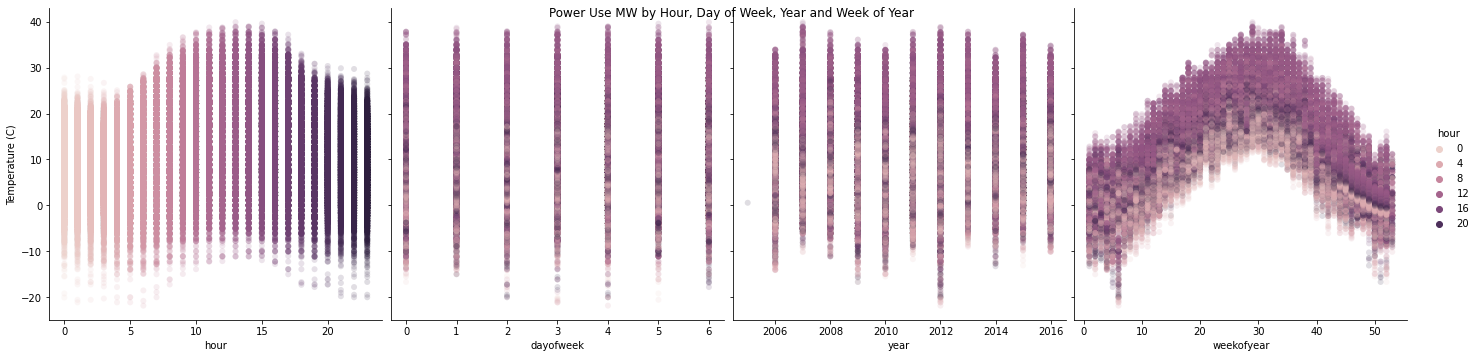

In [ ]:
sns.pairplot(features_and_target_temp.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Temperature (C)',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Day of Week, Year and Week of Year')
plt.show()

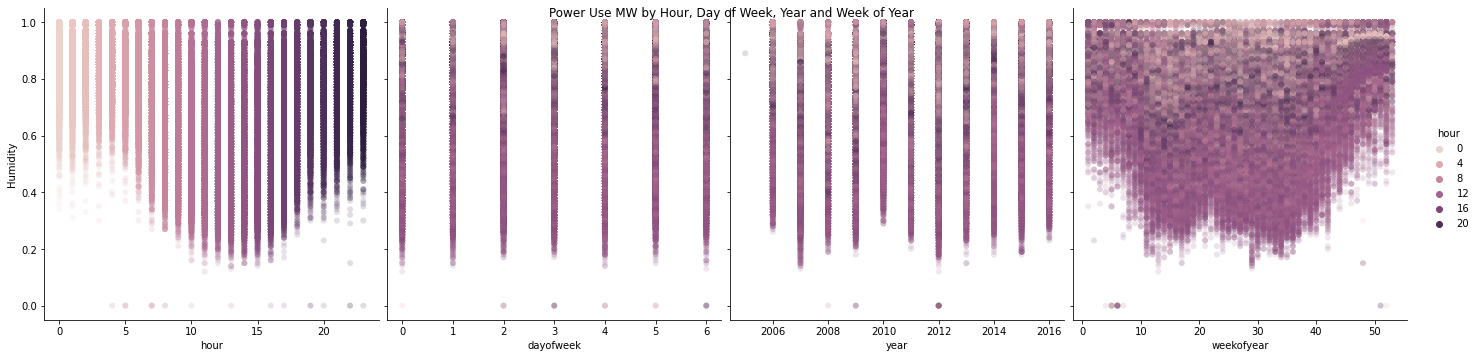

In [ ]:
sns.pairplot(features_and_target_wind.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Humidity',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Hour, Day of Week, Year and Week of Year')
plt.show()

In [ ]:
pjme_test

Formatted Date  ...      Time
Datetime                                       ...          
2015-03-31 22:00:00 2015-03-31 22:00:00+00:00  ...  22:00:00
2015-03-31 23:00:00 2015-03-31 23:00:00+00:00  ...  23:00:00
2015-04-01 00:00:00 2015-04-01 00:00:00+00:00  ...  00:00:00
2015-04-01 01:00:00 2015-04-01 01:00:00+00:00  ...  01:00:00
2015-04-01 02:00:00 2015-04-01 02:00:00+00:00  ...  02:00:00
...                                       ...  ...       ...
2016-09-09 17:00:00 2016-09-09 17:00:00+00:00  ...  17:00:00
2016-09-09 18:00:00 2016-09-09 18:00:00+00:00  ...  18:00:00
2016-09-09 19:00:00 2016-09-09 19:00:00+00:00  ...  19:00:00
2016-09-09 20:00:00 2016-09-09 20:00:00+00:00  ...  20:00:00
2016-09-09 21:00:00 2016-09-09 21:00:00+00:00  ...  21:00:00

[17542 rows x 14 columns]

In [9]:
split_date = '01-Jan-2015'
pjme_train = data.loc[data.index <= split_date].copy()
pjme_test = data.loc[data.index > split_date].copy()
pjme_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'Humidity':'y'}).head()
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = Prophet()
model.fit(pjme_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'Humidity':'y'}))

In [10]:
pjme_test_fcst = model.predict(df=pjme_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [11]:
pjme_test_fcst.head()

ds     trend  ...  multiplicative_terms_upper      yhat
0 2015-01-01 01:00:00  0.740324  ...                         0.0  1.003439
1 2015-01-01 02:00:00  0.740323  ...                         0.0  1.012841
2 2015-01-01 03:00:00  0.740321  ...                         0.0  1.017964
3 2015-01-01 04:00:00  0.740320  ...                         0.0  1.013291
4 2015-01-01 05:00:00  0.740319  ...                         0.0  0.992672

[5 rows x 22 columns]

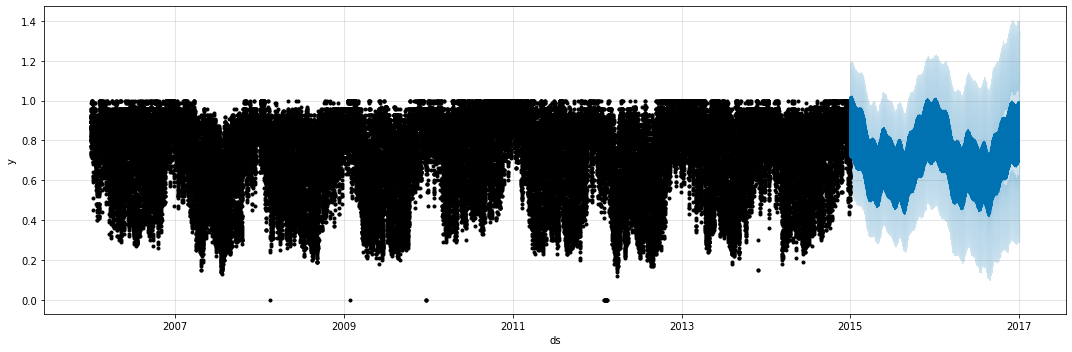

In [12]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

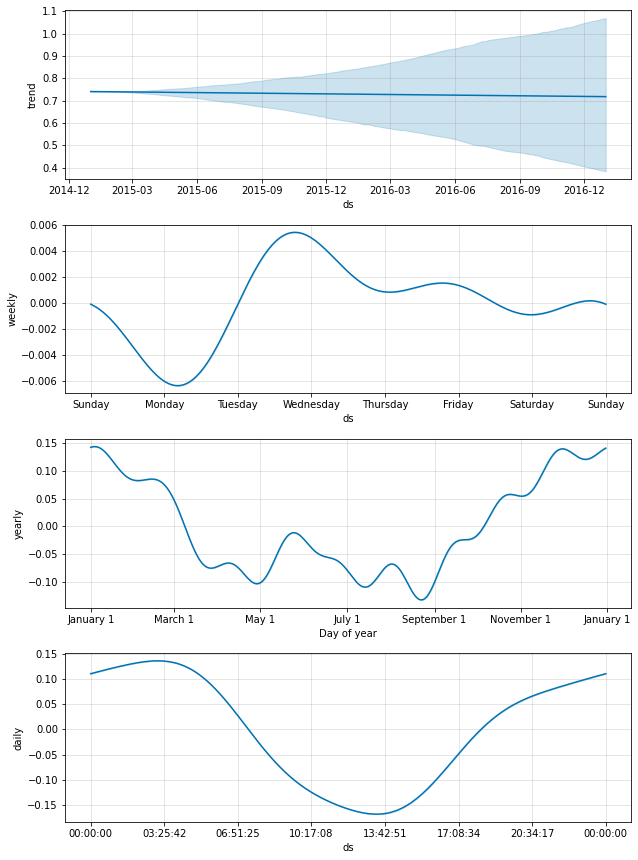

In [13]:
fig = model.plot_components(pjme_test_fcst)

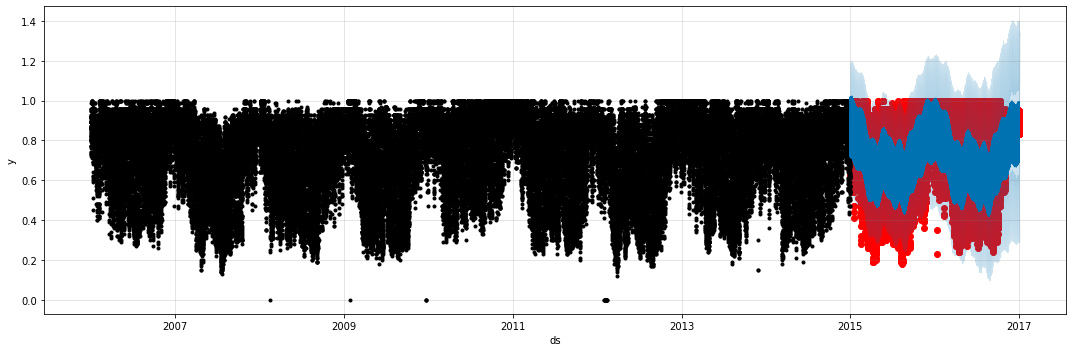

In [17]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Humidity'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

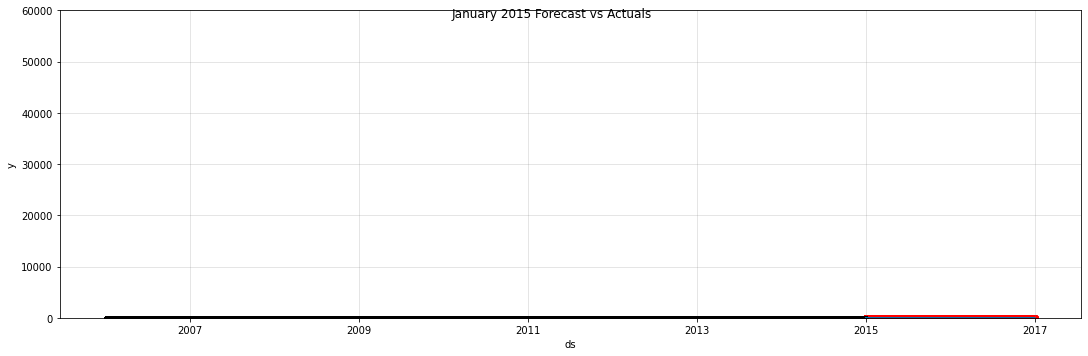

In [18]:
# Look at first month of predictions¶
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Humidity'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
# ax.set_xbound(lower='01-01-2015',
#               upper='02-01-2015')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')

In [24]:
print('mean_squared_error : ' , mean_squared_error(y_true=pjme_test['Humidity'],
                   y_pred=pjme_test_fcst['yhat']))

mean_squared_error :  0.037437051430983366


In [25]:
print('mean_absolute_error : ' ,mean_absolute_error(y_true=pjme_test['Humidity'],
                   y_pred=pjme_test_fcst['yhat']))

mean_absolute_error :  0.1556941125097308


In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=pjme_test['Humidity'],
                   y_pred=pjme_test_fcst['yhat'])

25.091908402001767

In [ ]:
split_date = '01-Jan-2015'
pjme_train = data.loc[data.index <= split_date].copy()
pjme_test = data.loc[data.index > split_date].copy()

In [ ]:
pjme_test \
    .rename(columns={'Temperature (C)': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'Temperature (C)': 'TRAINING SET'})\
    .plot(figsize=(15,5), title='PJM East', style='.')
plt.show()

In [ ]:
pjme_test

Formatted Date  ...      Time
Datetime                                       ...          
2015-03-31 22:00:00 2015-03-31 22:00:00+00:00  ...  22:00:00
2015-03-31 23:00:00 2015-03-31 23:00:00+00:00  ...  23:00:00
2015-04-01 00:00:00 2015-04-01 00:00:00+00:00  ...  00:00:00
2015-04-01 01:00:00 2015-04-01 01:00:00+00:00  ...  01:00:00
2015-04-01 02:00:00 2015-04-01 02:00:00+00:00  ...  02:00:00
...                                       ...  ...       ...
2016-09-09 17:00:00 2016-09-09 17:00:00+00:00  ...  17:00:00
2016-09-09 18:00:00 2016-09-09 18:00:00+00:00  ...  18:00:00
2016-09-09 19:00:00 2016-09-09 19:00:00+00:00  ...  19:00:00
2016-09-09 20:00:00 2016-09-09 20:00:00+00:00  ...  20:00:00
2016-09-09 21:00:00 2016-09-09 21:00:00+00:00  ...  21:00:00

[17542 rows x 14 columns]

In [ ]:
pjme_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'Temperature (C)':'y'}).head()

ds            Formatted Date  ...      Dates      Time
0 2006-03-31 22:00:00 2006-03-31 22:00:00+00:00  ... 2006-03-31  22:00:00
1 2006-03-31 23:00:00 2006-03-31 23:00:00+00:00  ... 2006-03-31  23:00:00
2 2006-04-01 00:00:00 2006-04-01 00:00:00+00:00  ... 2006-04-01  00:00:00
3 2006-04-01 01:00:00 2006-04-01 01:00:00+00:00  ... 2006-04-01  01:00:00
4 2006-04-01 02:00:00 2006-04-01 02:00:00+00:00  ... 2006-04-01  02:00:00

[5 rows x 15 columns]

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = Prophet()
model.fit(pjme_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'Temperature (C)':'y'}))

In [ ]:
pjme_test_fcst = model.predict(df=pjme_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [ ]:
pjme_test_fcst.head()

ds      trend  ...  multiplicative_terms_upper      yhat
0 2015-01-01 01:00:00  12.694329  ...                         0.0 -2.313042
1 2015-01-01 02:00:00  12.694387  ...                         0.0 -2.646298
2 2015-01-01 03:00:00  12.694446  ...                         0.0 -2.800536
3 2015-01-01 04:00:00  12.694504  ...                         0.0 -2.597338
4 2015-01-01 05:00:00  12.694563  ...                         0.0 -1.890865

[5 rows x 22 columns]

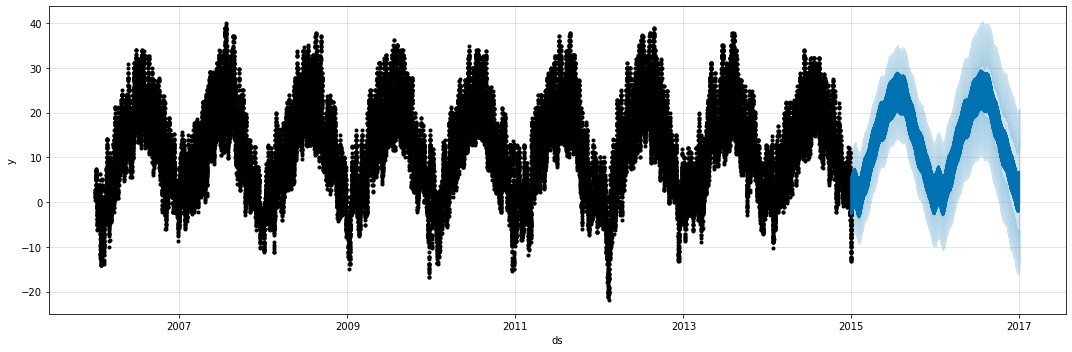

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

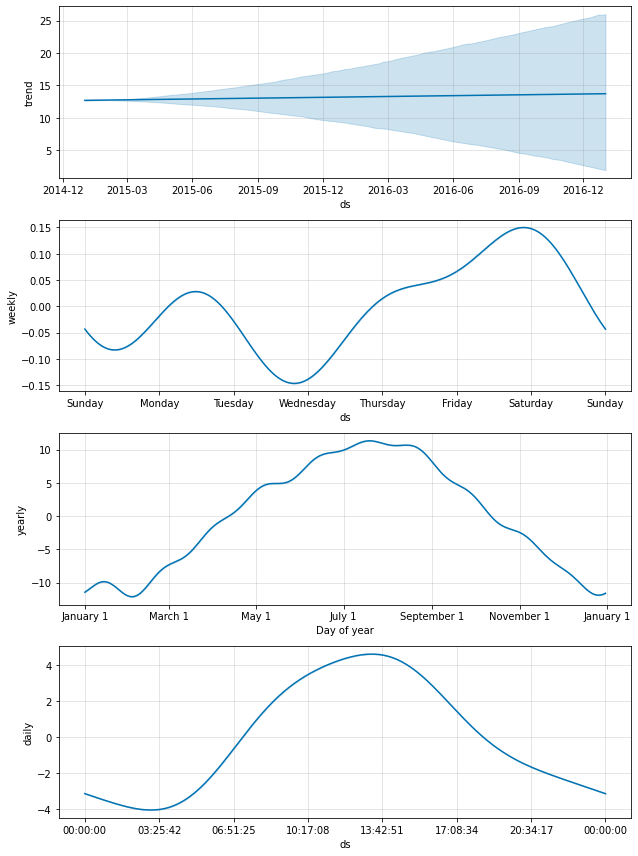

In [ ]:
fig = model.plot_components(pjme_test_fcst)

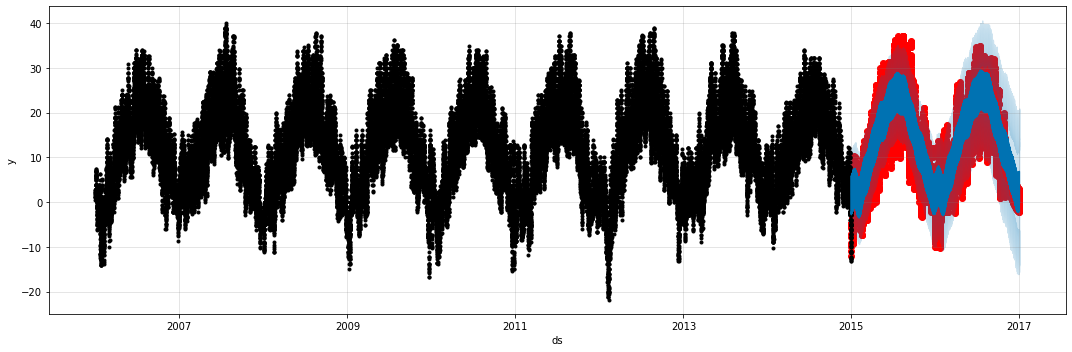

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Temperature (C)'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

In [ ]:
pjme_test_fcst

ds      trend  ...  multiplicative_terms_upper      yhat
0     2015-01-01 01:00:00  12.694329  ...                         0.0 -2.313042
1     2015-01-01 02:00:00  12.694387  ...                         0.0 -2.646298
2     2015-01-01 03:00:00  12.694446  ...                         0.0 -2.800536
3     2015-01-01 04:00:00  12.694504  ...                         0.0 -2.597338
4     2015-01-01 05:00:00  12.694563  ...                         0.0 -1.890865
...                   ...        ...  ...                         ...       ...
17537 2016-12-31 18:00:00  13.717673  ...                         0.0  2.650946
17538 2016-12-31 19:00:00  13.717731  ...                         0.0  1.651078
17539 2016-12-31 20:00:00  13.717790  ...                         0.0  0.917642
17540 2016-12-31 21:00:00  13.717848  ...                         0.0  0.378513
17541 2016-12-31 22:00:00  13.717906  ...                         0.0 -0.065534

[17542 rows x 22 columns]

ConversionError: ignored

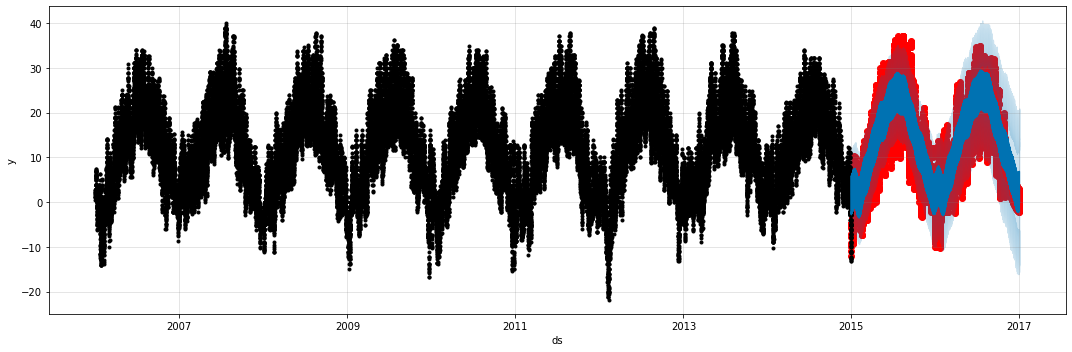

In [ ]:
# Look at first month of predictions¶
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Temperature (C)'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2015',
              upper='02-01-2015')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')

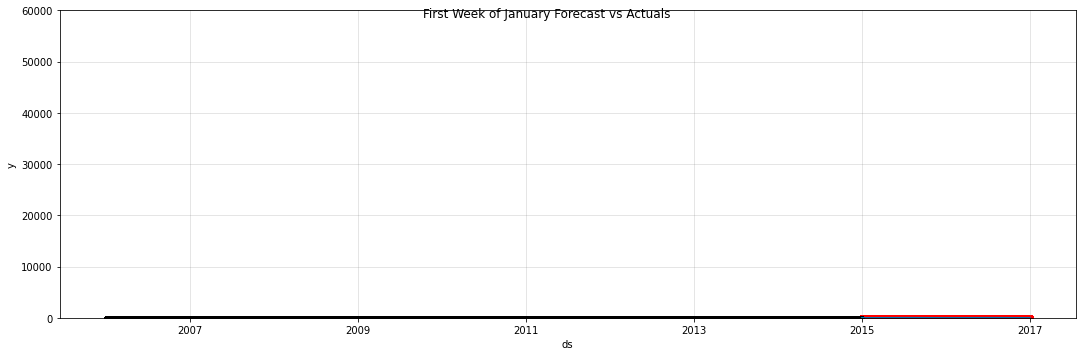

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Temperature (C)'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
# ax.set_xbound(lower='01-01-2015', upper='01-08-2015')
ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of January Forecast vs Actuals')

In [ ]:
mean_squared_error(y_true=pjme_test['Temperature (C)'],
                   y_pred=pjme_test_fcst['yhat'])

141.02228813979727

In [ ]:
mean_absolute_error(y_true=pjme_test['Temperature (C)'],
                   y_pred=pjme_test_fcst['yhat'])

9.706190515933303

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=pjme_test['Temperature (C)'],
                   y_pred=pjme_test_fcst['yhat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



inf

# CNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# df_1=data[['Temperature (C)',	'Apparent Temperature (C)'	,'Humidity',	'Wind Speed (km/h)',
#            'Wind Bearing (degrees)',	'Visibility (km)',	'Loud Cover',	'Pressure (millibars)']].values
df_1=data['Temperature (C)'].values

df_1=df_1.astype('float32')
df_1 = df_1.reshape((-1,1))
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [ ]:
df_1

array([[ 9.472222],
       [ 9.355556],
       [ 9.377778],
       ...,
       [22.038889],
       [21.522223],
       [20.438889]], dtype=float32)

In [ ]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 90000
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]    

In [ ]:
len(X)

96423

In [ ]:
Xtrain.shape

(90000, 30, 1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10, verbose=1)

Epoch 1/10
2813/2813 [==============================] - 11s 4ms/step - loss: 0.0042
Epoch 2/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0033
Epoch 3/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0031
Epoch 4/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0030
Epoch 5/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0029
Epoch 6/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0028
Epoch 7/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0028
Epoch 8/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0028
Epoch 9/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0027
Epoch 10/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0027


In [ ]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [ ]:
preds

array([[ 0.0519169 ],
       [-0.00446861],
       [-0.00477005],
       ...,
       [ 0.1065045 ],
       [ 0.09451925],
       [ 0.10076757]], dtype=float32)

In [ ]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

0.0023126944

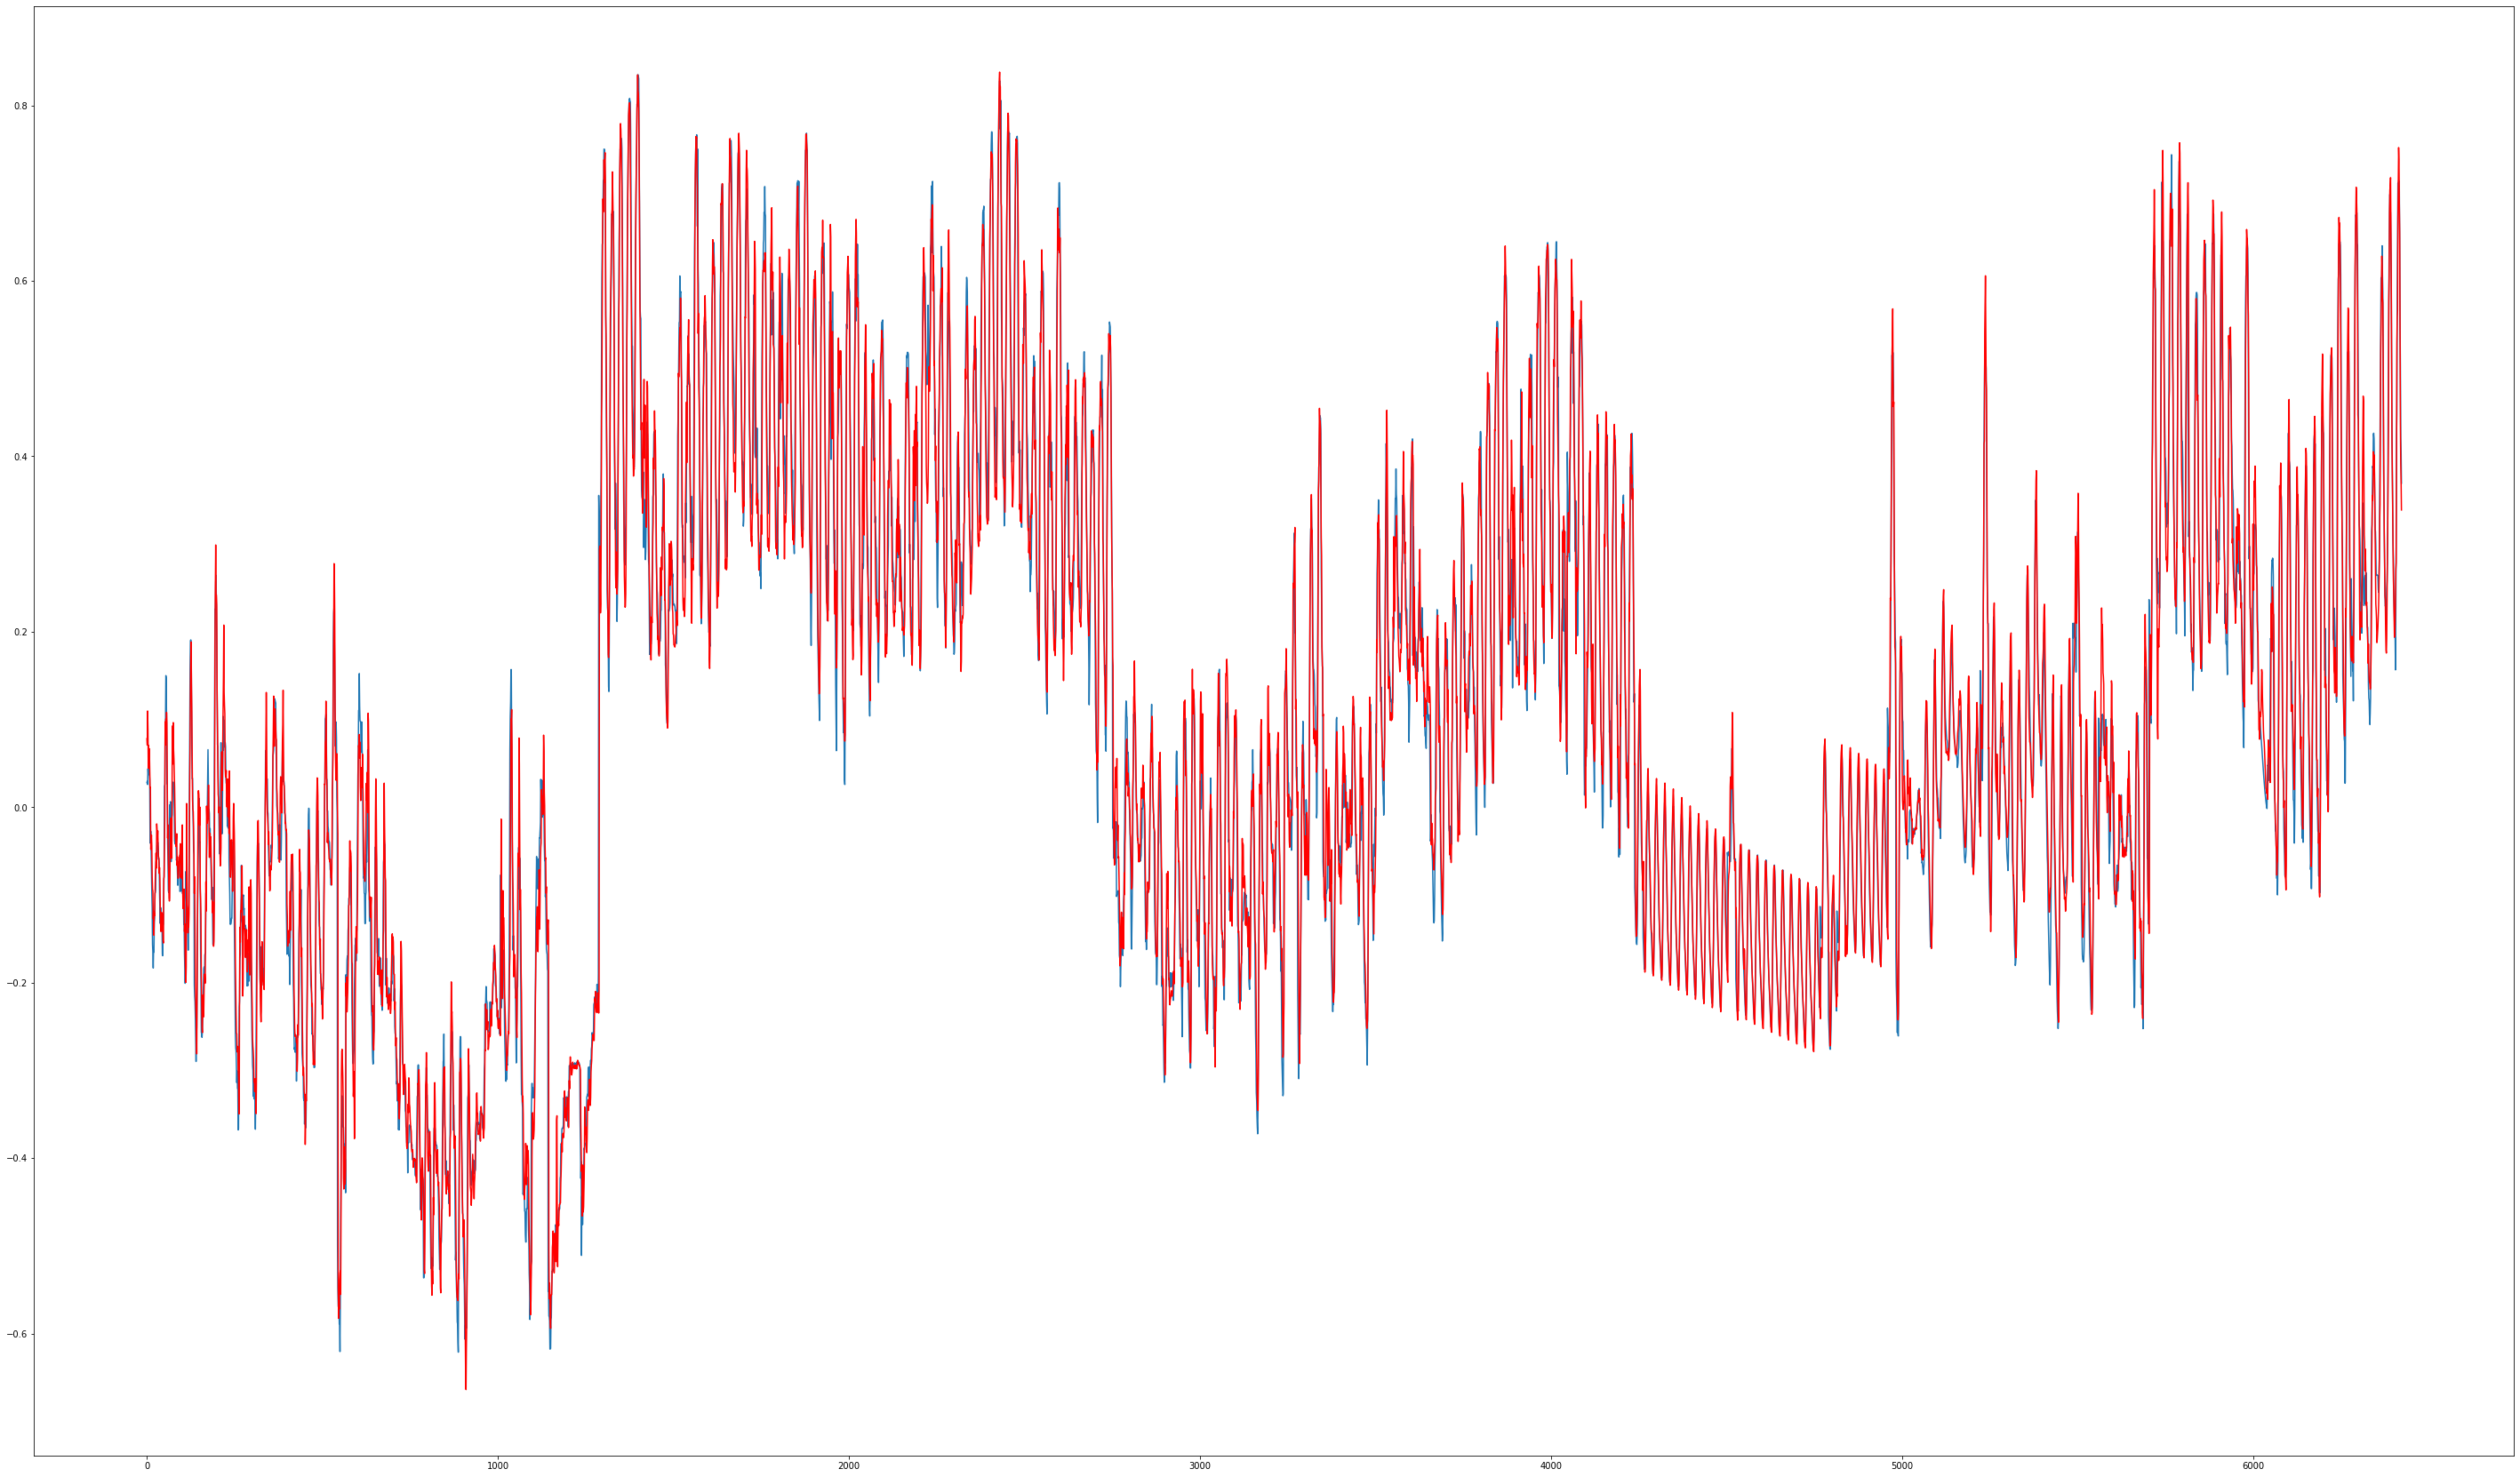

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,30))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# df_1=data[['Temperature (C)',	'Apparent Temperature (C)'	,'Humidity',	'Wind Speed (km/h)',
#            'Wind Bearing (degrees)',	'Visibility (km)',	'Loud Cover',	'Pressure (millibars)']].values
df_1=data['Temperature (C)'].values

df_1=df_1.astype('float32')
df_1 = df_1.reshape((-1,1))
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [ ]:
df_1

array([[ 9.472222],
       [ 9.355556],
       [ 9.377778],
       ...,
       [22.038889],
       [21.522223],
       [20.438889]], dtype=float32)

In [ ]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 90000
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]    

In [ ]:
len(X)

96423

In [ ]:
Xtrain.shape

(90000, 30, 1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10, verbose=1)

Epoch 1/10
2813/2813 [==============================] - 11s 4ms/step - loss: 0.0042
Epoch 2/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0033
Epoch 3/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0031
Epoch 4/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0030
Epoch 5/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0029
Epoch 6/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0028
Epoch 7/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0028
Epoch 8/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0028
Epoch 9/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0027
Epoch 10/10
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0027


In [ ]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [ ]:
preds

array([[ 0.0519169 ],
       [-0.00446861],
       [-0.00477005],
       ...,
       [ 0.1065045 ],
       [ 0.09451925],
       [ 0.10076757]], dtype=float32)

In [ ]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

0.0023126944

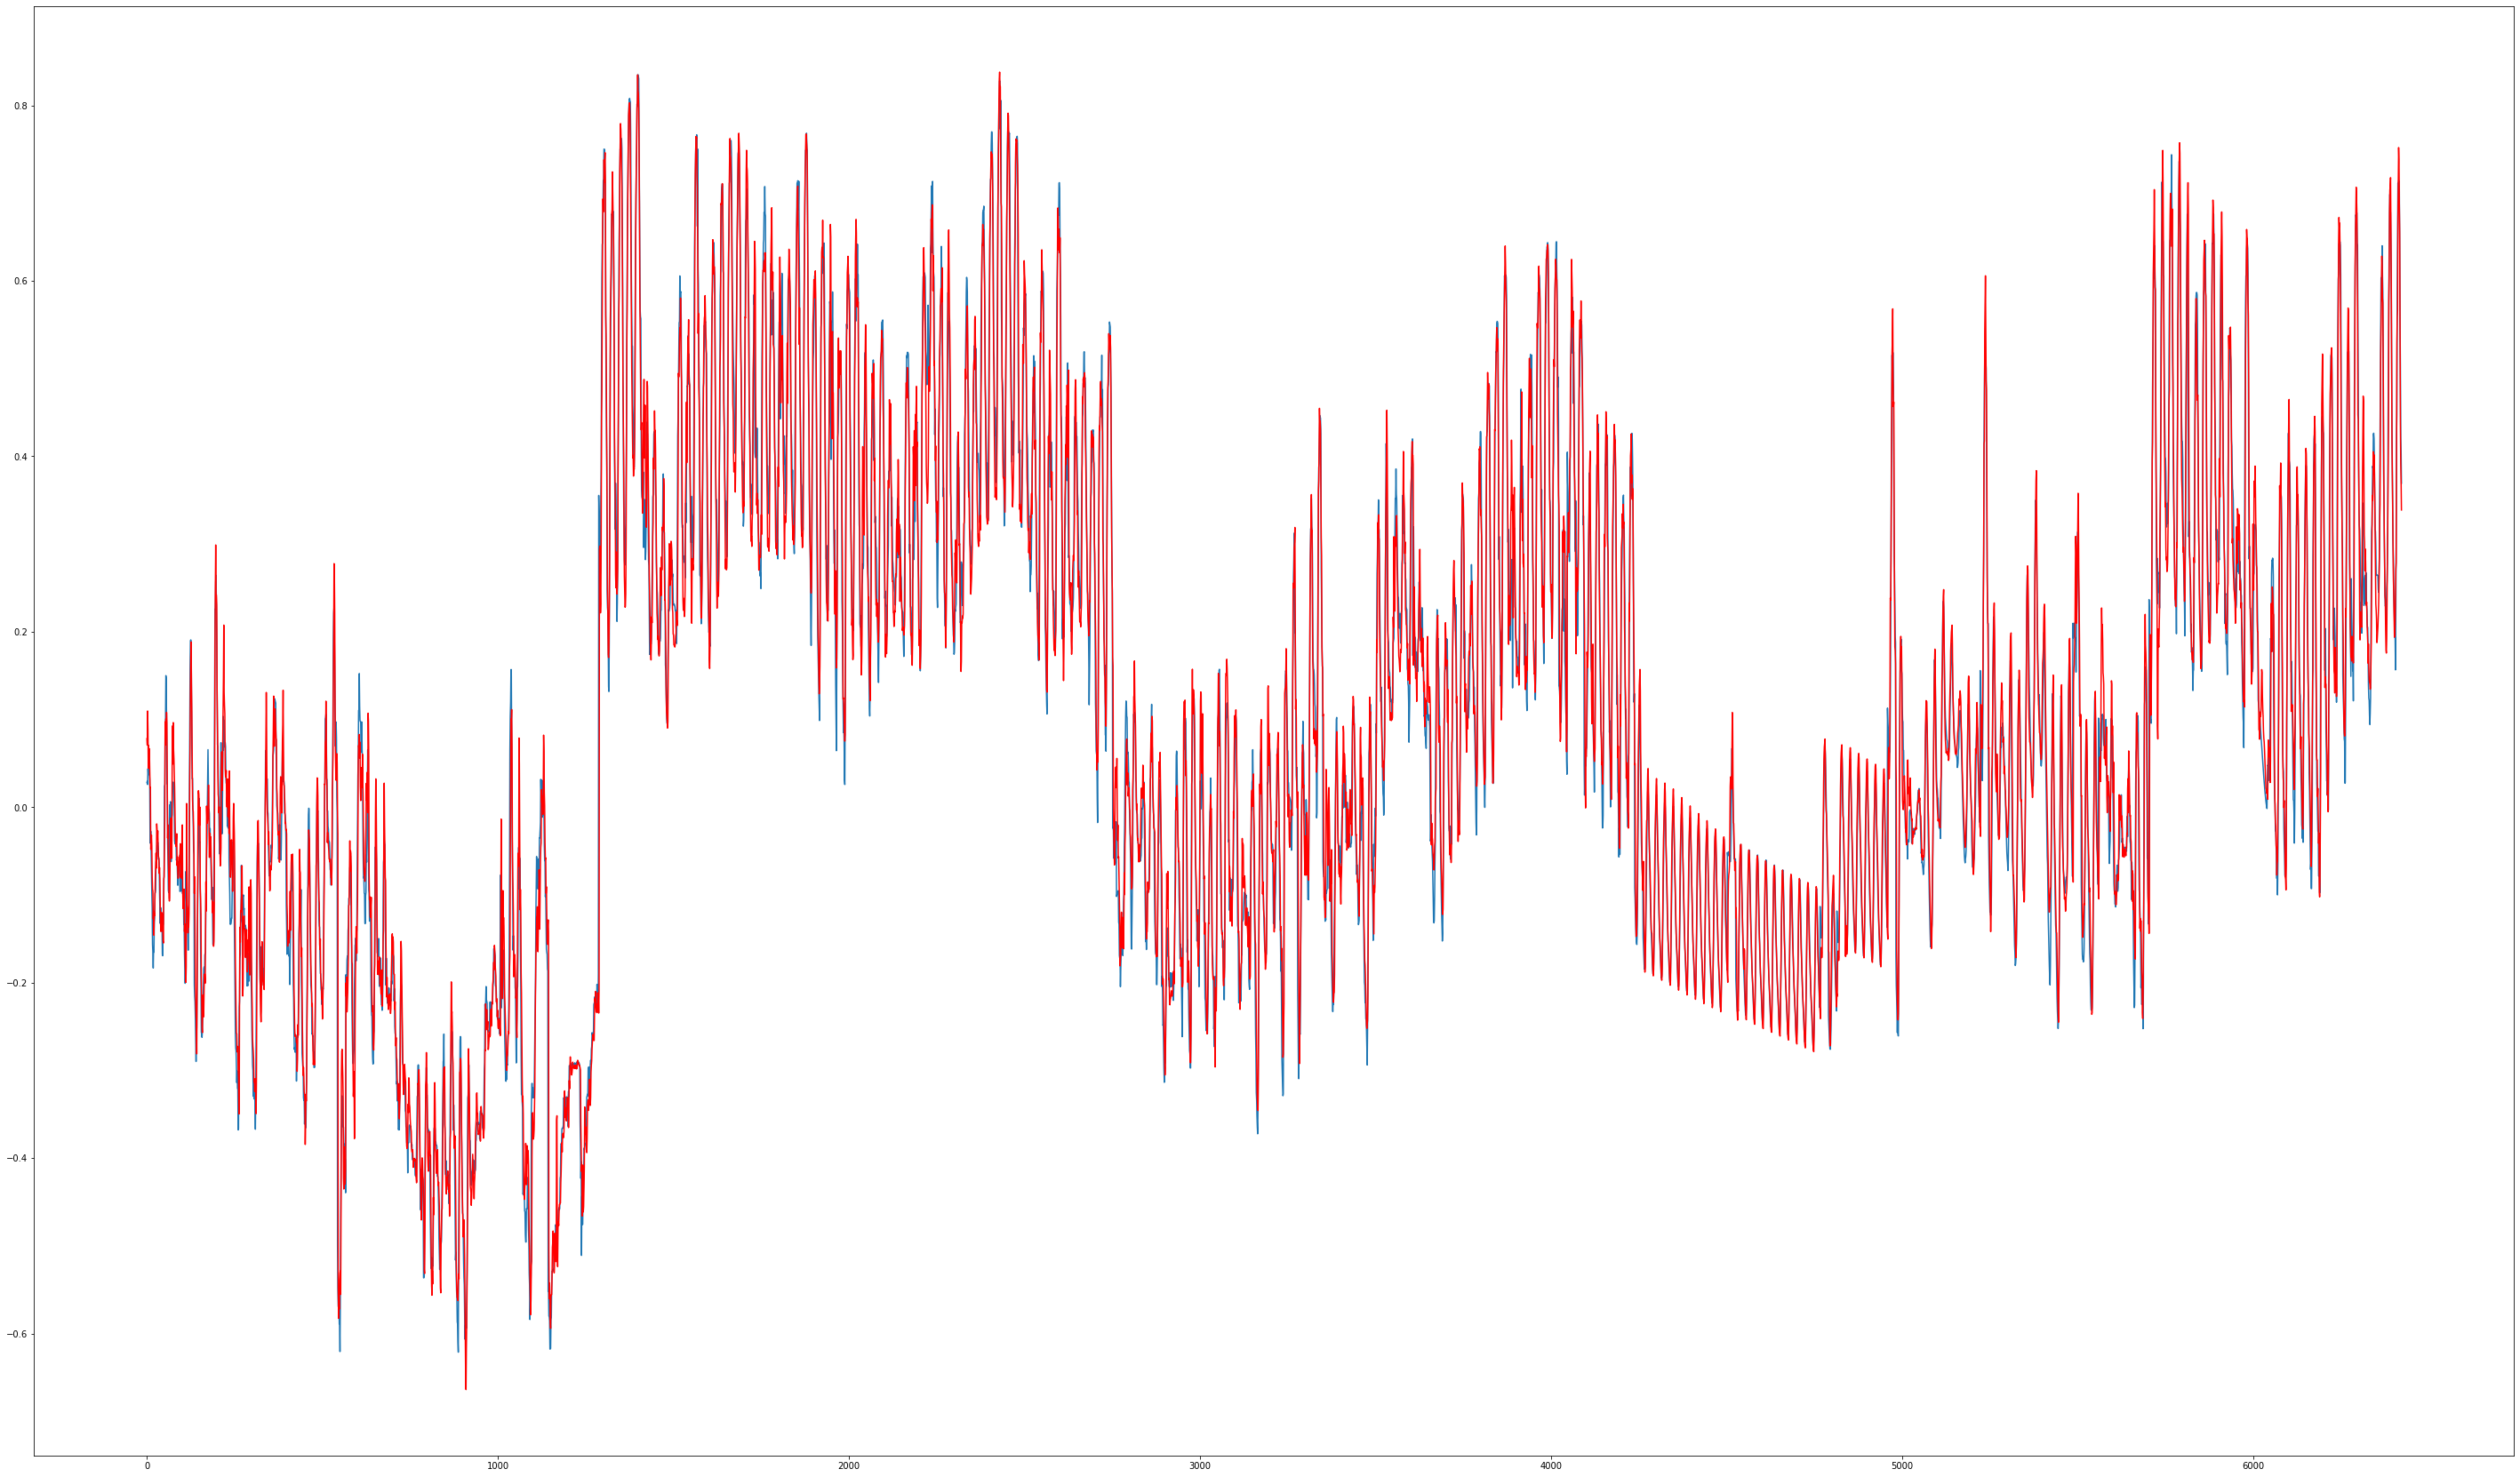

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,30))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()

In [ ]:
a = (data.iloc[0:90000].index)

In [ ]:
b = []
for i in range(1,9000):
  if(str(a[i]-a[i-1]) != '0 days 01:00:00'):
    # print(a[i]-a[i-1])
    b.append(i-1)
    b.append(i)

In [ ]:
b

In [ ]:
data.reset_index(inplace=True)

In [ ]:
for i in range(167):
  temp = data.iloc[b[i]]['Datetime']
  data.iloc[b[i+1]]['Datetime'].replace(year = temp.year , month = temp.month ,day = temp.day, hour = temp.hour)

In [ ]:
data

Datetime            Formatted Date  ...       Dates      Time
0     2006-03-31 22:00:00 2006-03-31 22:00:00+00:00  ...  2006-03-31  22:00:00
1     2006-03-31 23:00:00 2006-03-31 23:00:00+00:00  ...  2006-03-31  23:00:00
2     2006-04-01 00:00:00 2006-04-01 00:00:00+00:00  ...  2006-04-01  00:00:00
3     2006-04-01 01:00:00 2006-04-01 01:00:00+00:00  ...  2006-04-01  01:00:00
4     2006-04-01 02:00:00 2006-04-01 02:00:00+00:00  ...  2006-04-01  02:00:00
...                   ...                       ...  ...         ...       ...
96448 2016-09-09 17:00:00 2016-09-09 17:00:00+00:00  ...  2016-09-09  17:00:00
96449 2016-09-09 18:00:00 2016-09-09 18:00:00+00:00  ...  2016-09-09  18:00:00
96450 2016-09-09 19:00:00 2016-09-09 19:00:00+00:00  ...  2016-09-09  19:00:00
96451 2016-09-09 20:00:00 2016-09-09 20:00:00+00:00  ...  2016-09-09  20:00:00
96452 2016-09-09 21:00:00 2016-09-09 21:00:00+00:00  ...  2016-09-09  21:00:00

[96405 rows x 15 columns]

# Dart

In [2]:
pip install darts

     |████████████████████████████████| 326 kB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 9.3 MB/s 
     |████████████████████████████████| 9.8 MB 24.8 MB/s 
     |████████████████████████████████| 1.4 MB 38.1 MB/s 
     |████████████████████████████████| 165 kB 15.5 MB/s 
     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 792 kB 13.6 MB/s 
     |████████████████████████████████| 374 kB 46.5 MB/s 
     |████████████████████████████████| 895 kB 39.1 MB/s 
     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638882 sha256=1eeb75698a38563d62bca7dcb7615ec0fb1f521688b8d69c0c38b1bd2217326b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

In [1]:
data.reset_index(inplace=True)
data.drop_duplicates(subset ="Datetime",
                     keep = False, inplace = True)

NameError: ignored

In [ ]:
series = TimeSeries.from_dataframe(data,'Datetime',value_cols='Temperature (C)',fill_missing_dates=True)

In [ ]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

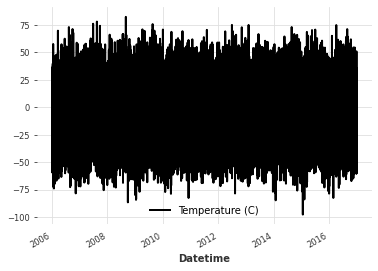

In [ ]:
series_noise = TimeSeries.from_times_and_values(series.time_index, np.random.randn(len(series)))
(series / 2 + 20 * series_noise - 10).plot()

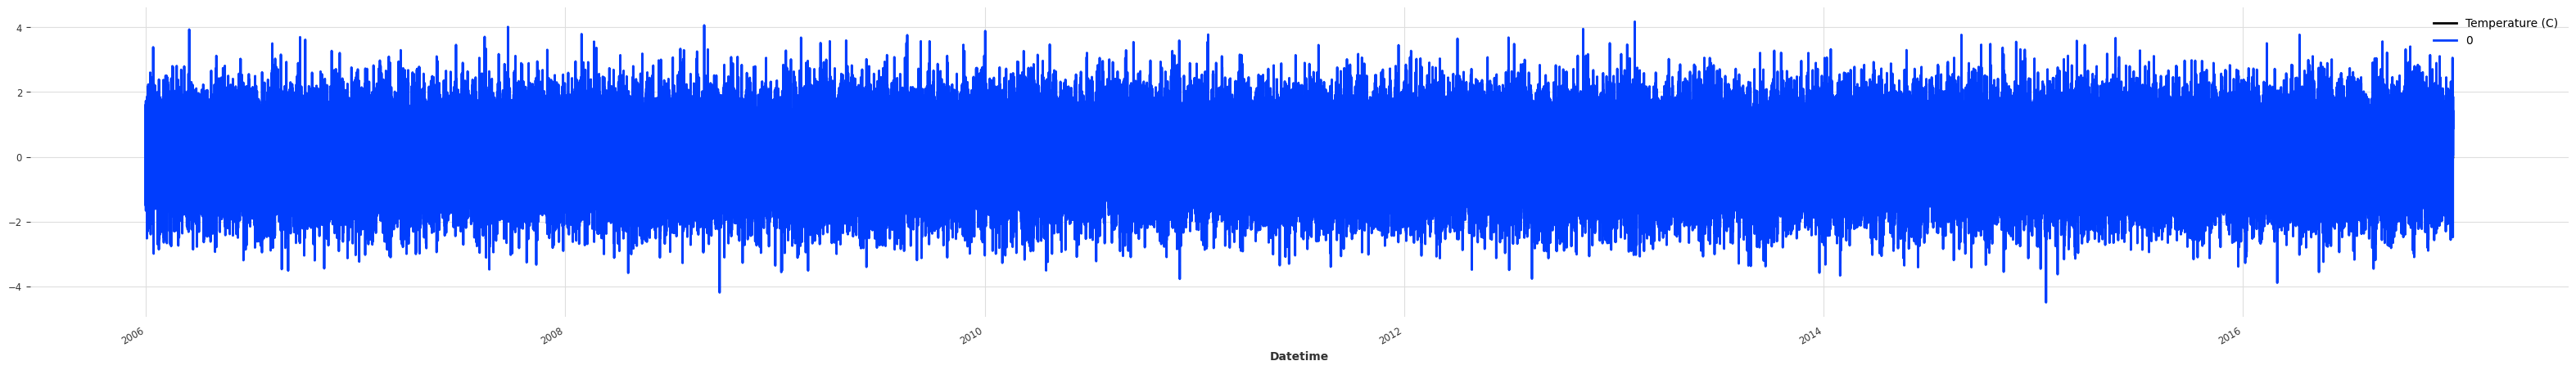

In [ ]:
plt.figure(figsize=(40,5), dpi=100)
(series / 50).stack(series_noise).plot()

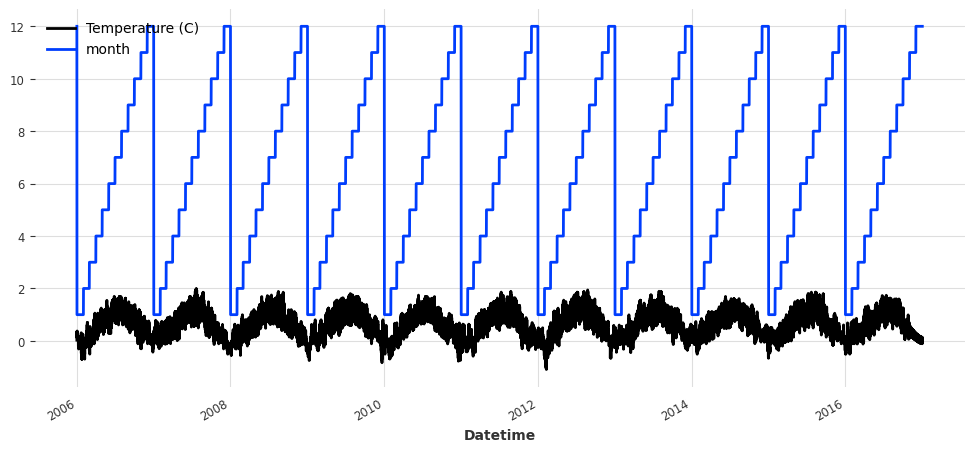

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
((series / 20).add_datetime_attribute('month').plot())


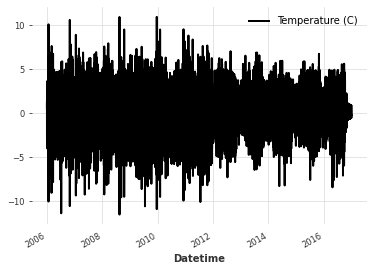

In [ ]:
series.diff().plot()


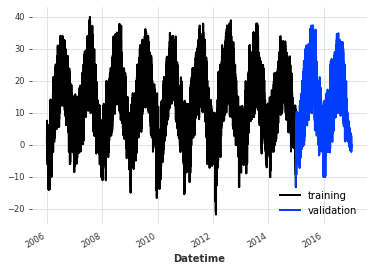

In [ ]:
train, val = series.split_before(pd.Timestamp('20150101'))
train.plot(label='training')
val.plot(label='validation')

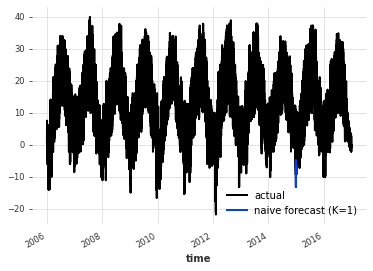

In [ ]:
# Playing with toy models
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=10)
naive_model.fit(train)
naive_forecast = naive_model.predict(12)

series.plot(label='actual')
naive_forecast.plot(label='naive forecast (K=1)')

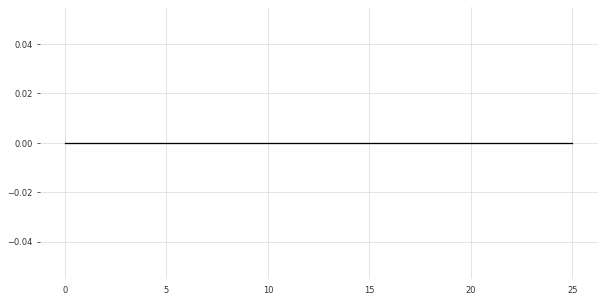

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=10, alpha=.8)

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=.05)
    if is_seasonal:
        print('There is seasonality of order {}.'.format(period))

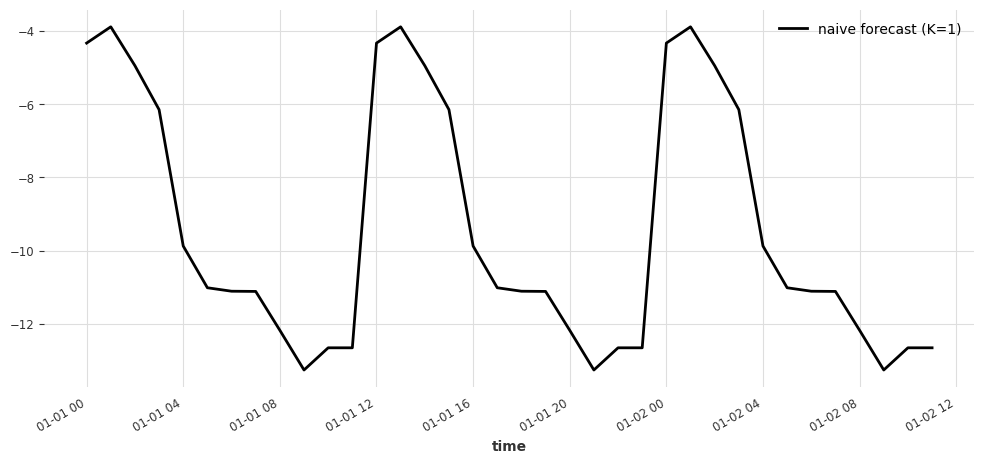

In [ ]:
from darts.models import NaiveSeasonal
plt.figure(figsize=(12,5), dpi=100)

naive_model = NaiveSeasonal(K=12)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

# series.plot(label='actual')
naive_forecast.plot(label='naive forecast (K=1)')

In [ ]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label='combined')
drift_forecast.plot(label='drift')


NameError: ignored

In [ ]:
from darts.dataprocessing.transformers import Scaler

train, val = series.split_after(pd.Timestamp('20150101'))

scaler = Scaler()
train_transformed = scaler.fit_transform(train)
val_transformed = scaler.transform(val)
series_transformed = scaler.transform(series)

In [ ]:
from darts.models import TCNModel

model = TCNModel(
    input_chunk_length=13,
    output_chunk_length=12,
    n_epochs=20, 
    dropout=0.2, 
    dilation_base=2, 
    weight_norm=True,
    kernel_size=3,
    num_filters=4,
    random_state=0
)

model.fit(
    training_series=train_transformed,
    target_series=train_transformed['Temperature (C)'],
    val_training_series=val_transformed,
    val_target_series=val_transformed['Temperature (C)'], 
verbose=True
)

In [ ]:
model.fit(
    series=train_transformed,
    val_series=val_transformed,
    verbose=True,
)

[2022-01-24 09:48:45,061] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 78866 samples.
[2022-01-24 09:48:45,061] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 78866 samples.
[2022-01-24 09:48:45,065] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 2
[2022-01-24 09:48:45,065] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 2
[2022-01-24 09:48:45,065] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 2
[2022-01-24 09:48:45,134] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-24 09:48:45,134] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  5%|▌         | 1/20 [00:29<09:22, 29.59s/it]

 55%|█████▌    | 11/20 [04:52<04:04, 27.14s/it]

100%|██████████| 20/20 [08:45<00:00, 26.26s/it]


In [ ]:
backtest = model.historical_forecasts(
    series=series,
    start=0.7,
    forecast_horizon=6,
    retrain=False,
    verbose=True,
)


100%|██████████| 28926/28926 [06:31<00:00, 73.87it/s]


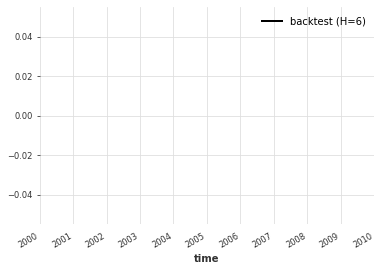

In [ ]:
# series.plot(label="actual")
backtest.plot(label="backtest (H=6)")
plt.legend()

In [ ]:
train_transformed.components

Index(['Temperature (C)'], dtype='object', name='component')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import TCNModel, RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, r2_score
from darts.utils.missing_values import fill_missing_values
from darts.datasets import AirPassengersDataset, SunspotsDataset, EnergyDataset


In [ ]:
# Read data:
ts = AirPassengersDataset().load()
scaler = Scaler()
ts = scaler.fit_transform(
    ts
)  # scale the whole time series not caring about train/val split...

# We'll use the month as a covariate
month_series = datetime_attribute_timeseries(ts, attribute="month", one_hot=True)
scaler_month = Scaler()
month_series = scaler_month.fit_transform(month_series)

# Create training and validation sets:
train, val = ts.split_after(pd.Timestamp("19580801"))
train_month, val_month = month_series.split_after(pd.Timestamp("19580801"))

In [ ]:
model_air = TCNModel(
    input_chunk_length=13,
    output_chunk_length=12,
    n_epochs=500,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,
)


<TimeSeries (DataArray) (Month: 116, component: 12, sample: 1)>
array([[[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [1.],
        ...,
...
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1958-08-01
  * component  (component) object 'month_1' 'month_2' ... 'month_11' 'month_12'
Dimensions without coordinates: sample